# Final Project Data Science Course ReDI Munich

## 1. Are CO2 emissions and energy consumption related?

## 2. Has CO2 emissions reduced after the implementation of carbon tax? 

Dataframe1: World CO2 emissions by sector

Dataframe2: Energy consumption

Dataframe3: Annual CO2 emissions

Dataframe4: Carbon Tax Rate

Dataframe5: CO2 emissions by sector


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import plotly.express as px 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table
import plotly.graph_objects as go

In [2]:
#Dataframe1: World CO2 emissions by sector - Year: 2016

df1 = pd.read_excel("World_by_sector.xlsx")

In [3]:
df1.head()

Sector  \
0                                    Energy   
1                      Industrial processes   
2                                     Waste   
3  Agriculture, Forestry & Land Use (AFOLU)   

   Share of global greenhouse gas emissions (%)  
0                                          73.2  
1                                           5.2  
2                                           3.2  
3                                          18.4

In [4]:
#Dataframe2: Energy consumption by source and region

df2 = pd.read_csv("energy-consumption-by-source-and-region.csv")

In [5]:
#Check dataframe
df2.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
0  Africa  NaN  1965            325.900637              9.543762   
1  Africa  NaN  1966            356.709630             10.669925   
2  Africa  NaN  1967            353.833321             10.545678   
3  Africa  NaN  1968            373.394345             10.688978   
4  Africa  NaN  1969            378.536268             12.492010   

   Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
0             323.496397                     0.0               38.626795   
1             323.122452                     0.0               43.083379   
2             330.291849                     0.0               44.974026   
3             343.513186                     0.0               52.606544   
4             346.643199                     0.0               61.391409   

   Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    0.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

   Biofuels (TWh)  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [6]:
#Check dataframe shape
df2.shape

(6560, 12)

In [7]:
#Check dataframe columns
df2.columns

Index(['Entity', 'Code', 'Year', 'Oil Consumption - EJ',
       'Gas Consumption - EJ', 'Coal Consumption - EJ',
       'Solar Consumption - EJ', 'Hydro Consumption - EJ',
       'Nuclear Consumption - EJ', 'Wind Consumption - EJ',
       'Geo Biomass Other - EJ', 'Biofuels (TWh)'],
      dtype='object')

In [8]:
#Converting values in column Biofuels to Exajoules to be equal to all other variables

df2["Biofuels (TWh)"] = df2["Biofuels (TWh)"]/278

In [9]:
df2["Biofuels (TWh)"].sum()

118.00479136690647

In [10]:
#Check dataframe countries
df2["Entity"].unique()

array(['Africa', 'Algeria', 'Angola', 'Argentina', 'Asia Pacific',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Brunei', 'Bulgaria',
       'CIS', 'Canada', 'Central America', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Eastern Africa', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia', 'Europe',
       'Europe (other)', 'Finland', 'France', 'Gabon', 'Germany',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East',
       'Mongolia', 'Morocco', 'Mozambique', 'Myanmar'

In [11]:
#Dataframe3: Annual CO2 emissions by Region

df3 = pd.read_csv("annual-co-emissions-by-region.csv")

In [12]:
df3.tail()

Entity Code  Year  Annual CO2 emissions
63175  Zimbabwe  ZWE  2015            12170460.0
63176  Zimbabwe  ZWE  2016            10814761.0
63177  Zimbabwe  ZWE  2017            10246841.0
63178  Zimbabwe  ZWE  2018            11340575.0
63179  Zimbabwe  ZWE  2019            10374287.0

In [13]:
#Check dataframe countries
df3["Entity"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia (excl. China & India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU-27', 'EU-28', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eston

In [14]:
#Dataframe4: Carbon Tax Rate - European with Carbon Tax published

df4 = pd.read_excel("CarbonTax.xlsx")

In [15]:
df4.head(20)

Entity  Cost by ton.CO2  Started year
0       Denmark            23.77          1992
1       Estonia             1.83          2000
2       Finland            62.18          1990
3        France            44.81          2014
4       Germany            24.00          2020
5      Ireland             25.60          2010
6        Latvia             9.14          2004
7    Luxembourg            20.00          2021
8   Netherlands            12.00          2020
9        Poland             0.09          1990
10     Portugal            23.77          2015
11     Slovenia            17.37          1996
12        Spain            14.63          2014
13      Sweden            108.81          1991

In [16]:
#Dataframe5: CO2 emissions by Sector in million ton

df5 = pd.read_csv("co-emissions-by-sector.csv")

In [17]:
df5.head(20)

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
0   Afghanistan  AFG  1990                    NaN                40000.0   
1   Afghanistan  AFG  1991                    NaN                40000.0   
2   Afghanistan  AFG  1992                    NaN                50000.0   
3   Afghanistan  AFG  1993                    NaN                50000.0   
4   Afghanistan  AFG  1994                    NaN                50000.0   
5   Afghanistan  AFG  1995                    NaN                50000.0   
6   Afghanistan  AFG  1996                    NaN                50000.0   
7   Afghanistan  AFG  1997                    NaN                50000.0   
8   Afghanistan  AFG  1998                    NaN                50000.0   
9   Afghanistan  AFG  1999                    NaN                50000.0   
10  Afghanistan  AFG  2000                    NaN                20000.0   
11  Afghanistan  AFG  2001                    NaN                20000.0   
12  Afghanistan  AFG  2002                    NaN                20000.0   
13  Afghanistan  AFG  2003                    NaN                30000.0   
14  Afghanistan  AFG  2004                    NaN                30000.0   
15  Afghanistan  AFG  2005                    NaN                20000.0   
16  Afghanistan  AFG  2006                    NaN                20000.0   
17  Afghanistan  AFG  2007                    NaN                10000.0   
18  Afghanistan  AFG  2008                    NaN                10000.0   
19  Afghanistan  AFG  2009                    NaN                10000.0   

    Land-Use Change and Forestry (CAIT, 2020)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
5                                         0.0   
6                                         0.0   
7                                         0.0   
8                                         0.0   
9                                         0.0   
10                                        0.0   
11                                        0.0   
12                                        0.0   
13                                        0.0   
14                                        0.0   
15                                        0.0   
16                                        0.0   
17                                        0.0   
18                                        0.0   
19                                        0.0   

    Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
0                                  NaN                     NaN   
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   
5                                  NaN                     NaN   
6                                  NaN                     NaN   
7                                  NaN                     NaN   
8                                  NaN                     NaN   
9                                  NaN                     NaN   
10                                 NaN                     NaN   
11                                 NaN                     NaN   
12                                 NaN                     NaN   
13                                 NaN                     NaN   
14                                 NaN                     NaN   
15                                 NaN                     NaN   
16                                 NaN                     NaN   
17                                 NaN                     NaN   
18                                 NaN                     NaN   
19                                 NaN                     NaN

In [18]:
df5.value_counts()

Entity    Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  Land-Use Change and Forestry (CAIT, 2020)  Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  Manufacturing & Construction (CAIT, 2020)  Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)
Zimbabwe  ZWE   2016  200000.0               500000.0                36040000.0                                700000.0                            2100000.0               1100000.0                                  0.0                              6200000.0                          1
Germany   DEU   2013  148400000.0            12500000.0             -40010000.0                                400000.0                            152400000.0             92700000.0                                 1480000.0                        369900000.0                        1
Ghana     GHA   1997  500000.0               690000.0                20430000.0                                200000.0                            230000

Visualizations & Analysis

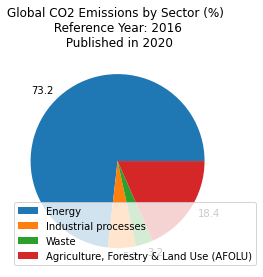

In [19]:
#Visualization: CO2 Emissions by sector - Year 2016 >>>Slide 6>>>

#Energy is the sector that generates the major percentage of CO2 emissions

plt.pie(df1["Share of global greenhouse gas emissions (%)"], labels=df1["Share of global greenhouse gas emissions (%)"], counterclock=True)
plt.title("Global CO2 Emissions by Sector (%) \n Reference Year: 2016 \n Published in 2020")
plt.legend(df1["Sector"],loc=3)
plt.show()

In [20]:
#Creating a dataframe with the average CO2 Emissions since 1900, grouped by Year 

#It will be used in the visualization "Average CO2 Global Emission" 

df3_historical = df3.loc[df3['Year'] > 1900]

In [21]:
hist_emission_grouped= df3_historical.groupby("Year").aggregate("mean")

Text(0.0, 1.0, 'Average Global CO2 Emissions - Thousand tons')

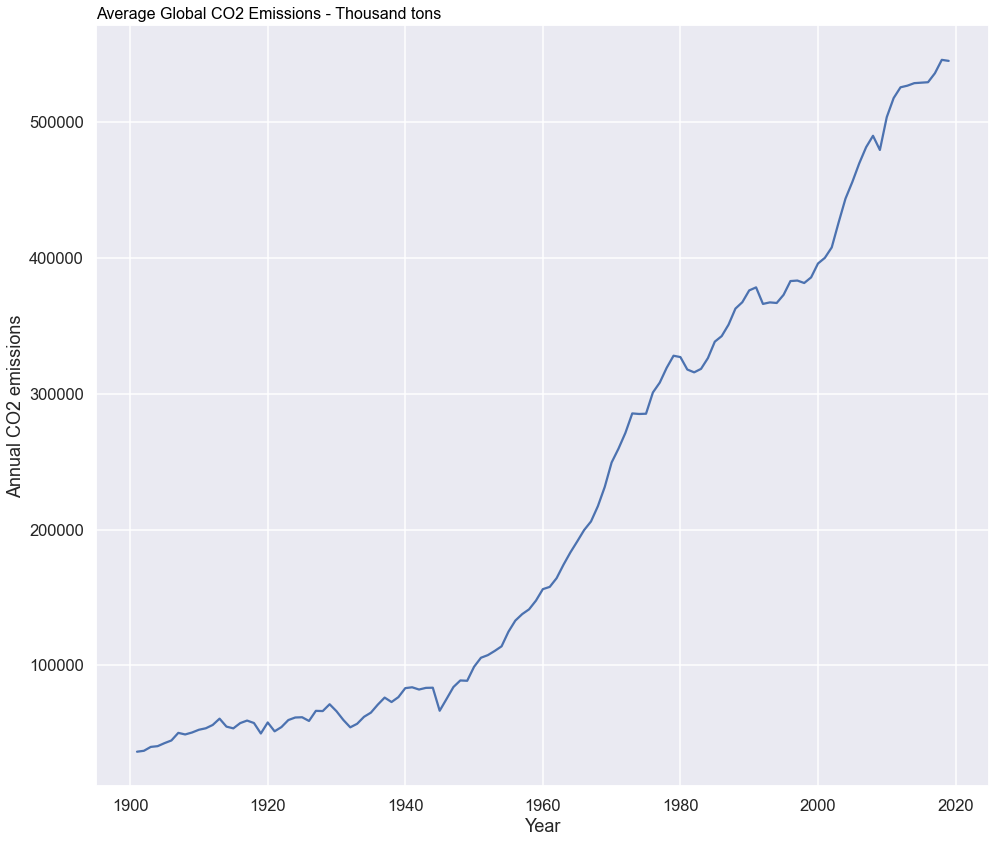

In [22]:
#Visualization: Average CO2 Global Emission  >>>Slide 7>>>

#Observation: There is a huge increase of CO2 emissions after the Third Industrial Revolution

sns.set_theme()
sns.set_context("talk")

plt.rcParams["figure.figsize"] = (16,14)
sns.lineplot(x="Year", y=(hist_emission_grouped["Annual CO2 emissions"]/1000), data= hist_emission_grouped)
plt.title("Average Global CO2 Emissions - Thousand tons", loc='left', fontsize=16, fontweight=0, color='black')


In [23]:
#Creating a dataframe with the Global Energy Consumption since 1900

#It will be used in the visualization "Average Global Energy Consumption" 

df2_historical= df2.loc[(df2["Year"] > 1900) & (df2["Entity"] == "World")]


In [24]:
df2_historical

Entity      Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
6326  World  OWID_WRL  1965          18108.643315           6303.803972   
6327  World  OWID_WRL  1966          19496.471127           6868.800021   
6328  World  OWID_WRL  1967          20890.580461           7374.045272   
6329  World  OWID_WRL  1968          22675.466031           8044.337930   
6330  World  OWID_WRL  1969          24576.884462           8833.425133   
...     ...       ...   ...                   ...                   ...   
6441  World  OWID_WRL  1960                   NaN                   NaN   
6442  World  OWID_WRL  1961                   NaN                   NaN   
6443  World  OWID_WRL  1962                   NaN                   NaN   
6444  World  OWID_WRL  1963                   NaN                   NaN   
6445  World  OWID_WRL  1964                   NaN                   NaN   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
6326           16140.191199                     0.0             2564.440729   
6327           16324.106908                     0.0             2732.827289   
6328           16060.822581                     0.0             2793.731823   
6329           16301.159717                     0.0             2942.471820   
6330           16798.749279                     0.0             3115.955885   
...                     ...                     ...                     ...   
6441                    NaN                     NaN                     NaN   
6442                    NaN                     NaN                     NaN   
6443                    NaN                     NaN                     NaN   
6444                    NaN                     NaN                     NaN   
6445                    NaN                     NaN                     NaN   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
6326                 70.943735                    0.0               49.959018   
6327                 95.648105                    0.0               55.016730   
6328                113.905686                    0.0               55.518296   
6329                144.758905                    0.0               61.444619   
6330                171.620725                    0.0               64.605508   
...                        ...                    ...                     ...   
6441                       NaN                    NaN                     NaN   
6442                       NaN                    NaN                     NaN   
6443                       NaN                    NaN                     NaN   
6444                       NaN                    NaN                     NaN   
6445                       NaN                    NaN                     NaN   

      Biofuels (TWh)  
6326             0.0  
6327             0.0  
6328             0.0  
6329             0.0  
6330             0.0  
...              ...  
6441             0.0  
6442             0.0  
6443             0.0  
6444             0.0  
6445             0.0  

[119 rows x 12 columns]

In [25]:
#Creating column "tt_energy_consumption" with the total energy consumption 

df2_historical["Total_energy_consumption"] = df2_historical["Oil Consumption - EJ"] + df2_historical["Gas Consumption - EJ"] + df2_historical["Coal Consumption - EJ"] + df2_historical["Solar Consumption - EJ"] + df2_historical["Hydro Consumption - EJ"] + df2_historical["Nuclear Consumption - EJ"] + df2_historical["Wind Consumption - EJ"] + df2_historical["Geo Biomass Other - EJ"] + df2["Biofuels (TWh)"]

In [26]:
df2_historical.head()

Entity      Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
6326  World  OWID_WRL  1965          18108.643315           6303.803972   
6327  World  OWID_WRL  1966          19496.471127           6868.800021   
6328  World  OWID_WRL  1967          20890.580461           7374.045272   
6329  World  OWID_WRL  1968          22675.466031           8044.337930   
6330  World  OWID_WRL  1969          24576.884462           8833.425133   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
6326           16140.191199                     0.0             2564.440729   
6327           16324.106908                     0.0             2732.827289   
6328           16060.822581                     0.0             2793.731823   
6329           16301.159717                     0.0             2942.471820   
6330           16798.749279                     0.0             3115.955885   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
6326                 70.943735                    0.0               49.959018   
6327                 95.648105                    0.0               55.016730   
6328                113.905686                    0.0               55.518296   
6329                144.758905                    0.0               61.444619   
6330                171.620725                    0.0               64.605508   

      Biofuels (TWh)  Total_energy_consumption  
6326             0.0              43237.981969  
6327             0.0              45572.870180  
6328             0.0              47288.604119  
6329             0.0              50169.639022  
6330             0.0              53561.240992

Text(0.0, 1.0, 'Average Global Energy Consumption - Exajoules')

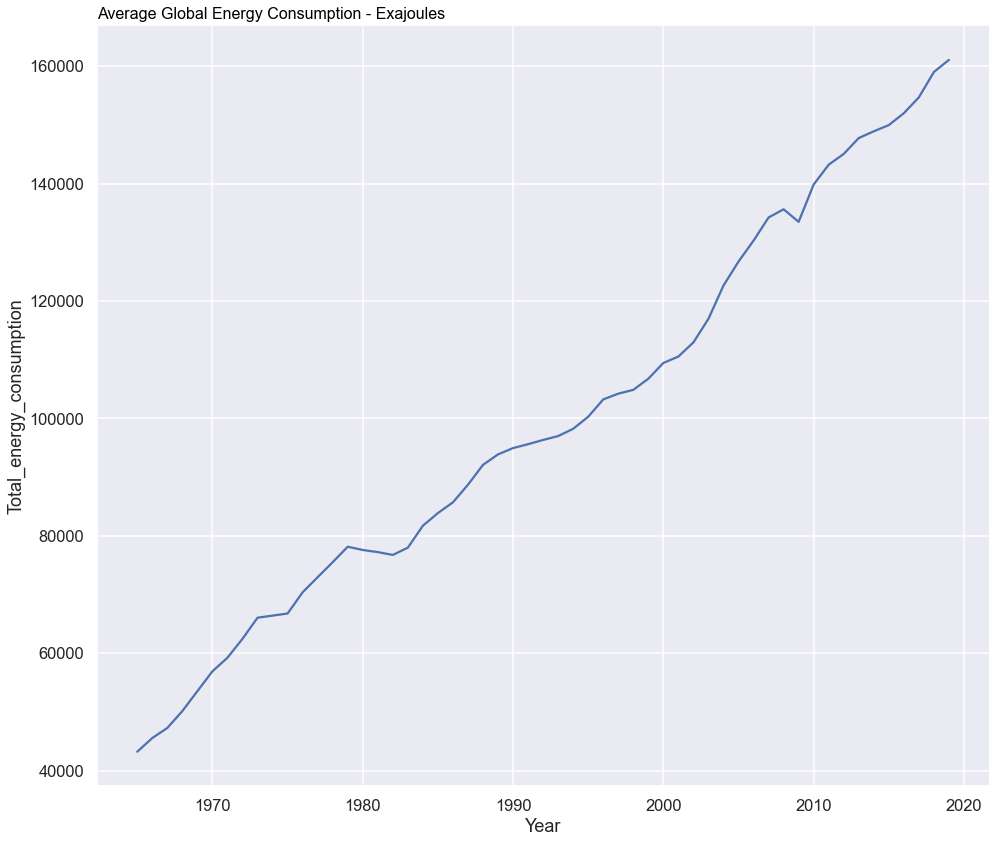

In [27]:
#Visualization: Average Global Energy Consumption  >>>Slide 8>>>

#Observation: It is possible to see that the energy consumption follow the same behavior as the CO2 emissions

sns.set_theme()
sns.set_context("talk")

plt.rcParams["figure.figsize"] = (16,14)
sns.lineplot(x="Year", y=(df2_historical["Total_energy_consumption"]), data= df2_historical)
plt.title("Average Global Energy Consumption - Exajoules", loc='left', fontsize=16, fontweight=0, color='black')


In [28]:
#Table European countries with Carbon Tax >>>> Slide 11>>>>>
df4.sort_values(by="Started year")

Entity  Cost by ton.CO2  Started year
2       Finland            62.18          1990
9        Poland             0.09          1990
13      Sweden            108.81          1991
0       Denmark            23.77          1992
11     Slovenia            17.37          1996
1       Estonia             1.83          2000
6        Latvia             9.14          2004
5      Ireland             25.60          2010
3        France            44.81          2014
12        Spain            14.63          2014
10     Portugal            23.77          2015
4       Germany            24.00          2020
8   Netherlands            12.00          2020
7    Luxembourg            20.00          2021

In [29]:
#Creating a tuple with the European countries with Carbon Tax Implemented

eu_countries = ("Denmark", "Estonia", "Finland", "Ireland", "Latvia", "Poland", "Slovenia", "Sweden")

In [30]:
#Creating dataframe CO2 emissions since 1950

co2_emissions = df3.loc[df3['Year'] > 1950]

In [31]:
co2_emissions = co2_emissions.loc[co2_emissions["Entity"].isin(eu_countries)]

In [32]:
co2_emissions.head(10)

Entity Code  Year  Annual CO2 emissions
15051  Denmark  DNK  1951            21921394.0
15052  Denmark  DNK  1952            22898760.0
15053  Denmark  DNK  1953            23151399.0
15054  Denmark  DNK  1954            25577115.0
15055  Denmark  DNK  1955            27064551.0
15056  Denmark  DNK  1956            26372352.0
15057  Denmark  DNK  1957            24899513.0
15058  Denmark  DNK  1958            26790523.0
15059  Denmark  DNK  1959            26034431.0
15060  Denmark  DNK  1960            29749520.0

Text(0.5, 1.0, 'CO2 emissions in selected European Countries (tons)')

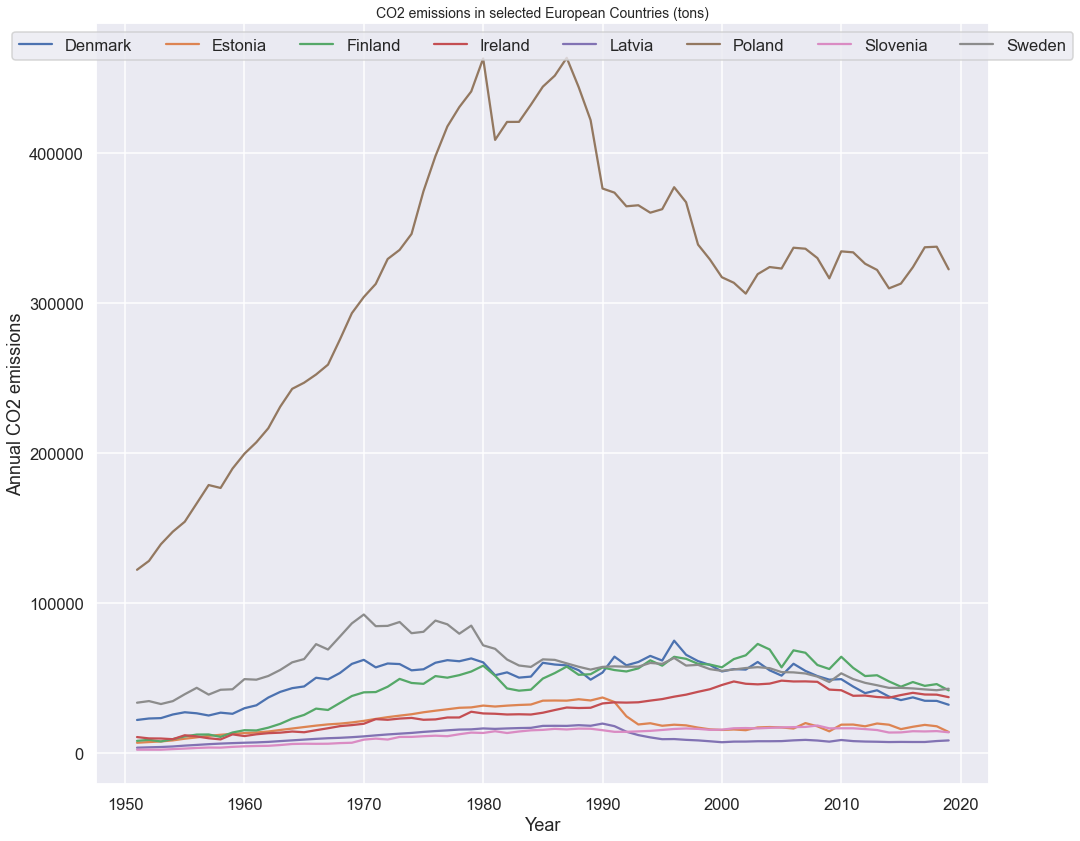

In [33]:
#Visualization: CO2 emissions in selected European countries (tons) >>>Slide 12>>>

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (16,14)
sns.lineplot(x="Year", y=((co2_emissions["Annual CO2 emissions"])/1000), data= co2_emissions, hue="Entity")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=10, fancybox=True)
plt.title("CO2 emissions in selected European Countries (tons)", fontsize=14, fontweight=2)

In [34]:
#Creating an object to look at the historical CO2 emissions in FINLAND

CO2_emissions_Finland = co2_emissions.loc[co2_emissions['Entity'] == "Finland"]

CO2_emissions_Finland = CO2_emissions_Finland.loc[CO2_emissions_Finland['Year'] > 1964]

CO2_emissions_Finland.head()


Entity Code  Year  Annual CO2 emissions
20195  Finland  FIN  1965            25300086.0
20196  Finland  FIN  1966            29488841.0
20197  Finland  FIN  1967            28587735.0
20198  Finland  FIN  1968            33281468.0
20199  Finland  FIN  1969            37896829.0

Text(0.5, 1.0, 'CO2 emissions in Finland (tons)')

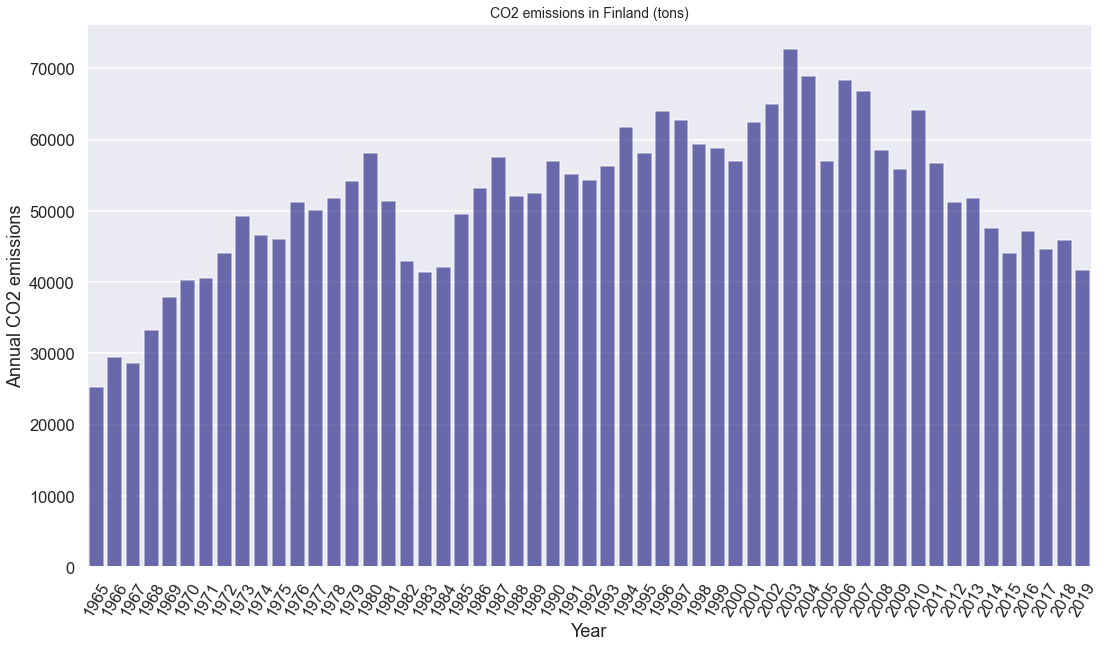

In [35]:
#Visualization: CO2 emissions in FINLAND (tons) >>>Slide 14>>>

#Observation: It is possible to see that the year with the highest CO2 emissions is 2003, after the implementation of 
#Carbon Tax 

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figFin = sns.barplot(x="Year", y=((CO2_emissions_Finland["Annual CO2 emissions"])/1000), data= CO2_emissions_Finland, color= "darkblue", alpha= 0.6)
figFin.set_xticklabels(figFin.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Finland (tons)", fontsize=14, fontweight=2)

In [36]:
#Creating an object to look at the historical CO2 emissions in DENMARK

CO2_emissions_Denmark = co2_emissions.loc[co2_emissions['Entity'] == "Denmark"]

CO2_emissions_Denmark = CO2_emissions_Denmark.loc[CO2_emissions_Denmark['Year'] > 1964]

CO2_emissions_Denmark.head()


Entity Code  Year  Annual CO2 emissions
15065  Denmark  DNK  1965            44293371.0
15066  Denmark  DNK  1966            50078411.0
15067  Denmark  DNK  1967            49026427.0
15068  Denmark  DNK  1968            53272676.0
15069  Denmark  DNK  1969            59342587.0

Text(0.5, 1.0, 'CO2 emissions in Denmark (tons)')

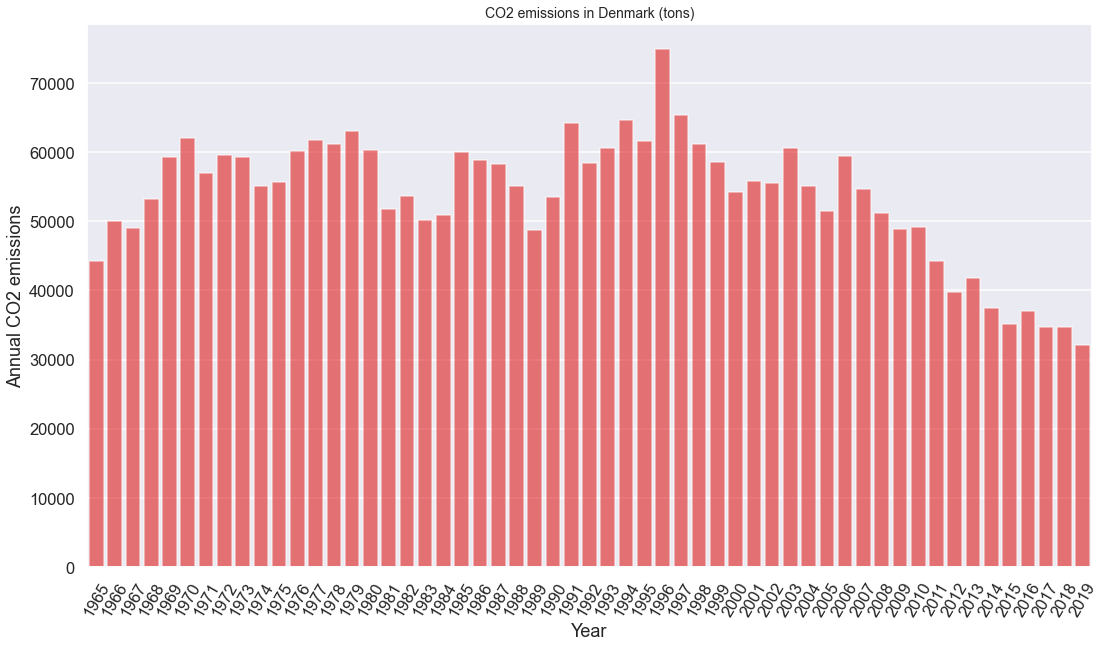

In [50]:
#Visualization: CO2 emissions in DENMARK (tons) >>>Slide 14>>>

#Observation: The year with the highest CO2 emissions is 2003 and there is a consistent reduce since 2006. 

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figDen = sns.barplot(x="Year", y=((CO2_emissions_Denmark["Annual CO2 emissions"])/1000), data= CO2_emissions_Denmark, color= "red", alpha= 0.6)
figDen.set_xticklabels(figDen.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Denmark (tons)", fontsize=14, fontweight=2)

In [38]:
#Creating an object to look at the historical CO2 emissions in SLOVENIA

CO2_emissions_Slovenia = co2_emissions.loc[co2_emissions['Entity'] == "Slovenia"]

CO2_emissions_Slovenia = CO2_emissions_Slovenia.loc[CO2_emissions_Slovenia['Year'] > 1964]

CO2_emissions_Slovenia.head()


Entity Code  Year  Annual CO2 emissions
51785  Slovenia  SVN  1965             6057235.0
51786  Slovenia  SVN  1966             6001805.0
51787  Slovenia  SVN  1967             6063054.0
51788  Slovenia  SVN  1968             6484069.0
51789  Slovenia  SVN  1969             6722891.0

Text(0.5, 1.0, 'CO2 emissions in Slovenia (tons)')

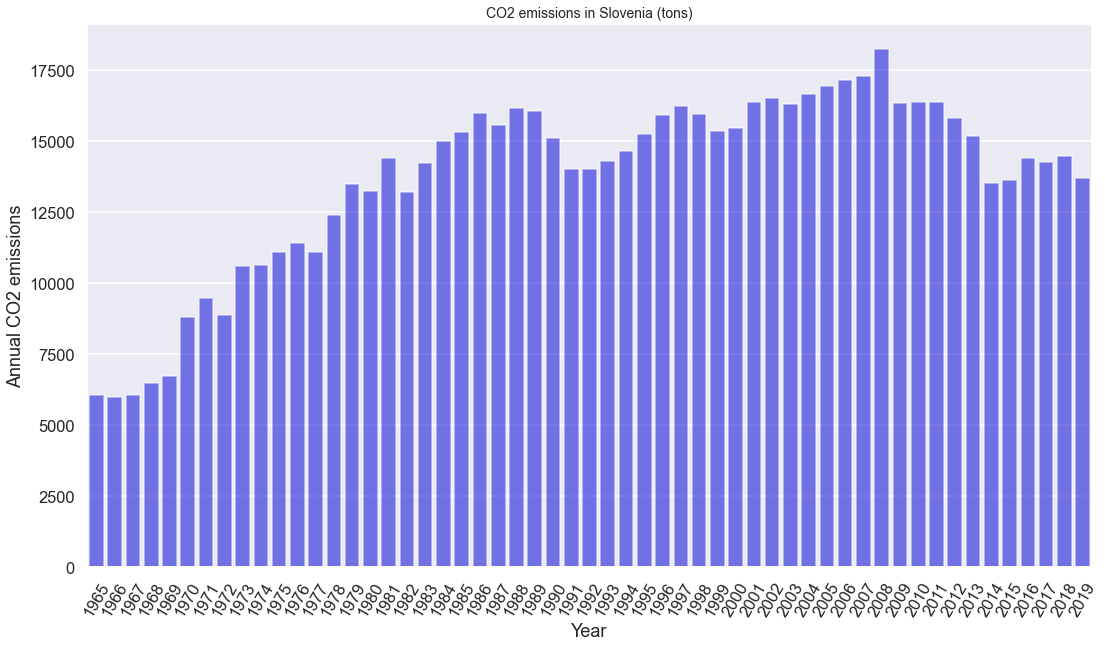

In [51]:
#Visualization: CO2 emissions in SLOVENIA (tons) >>>Slide 14>>>

#Observation: It is possible to see that the year with the highest CO2 emissions is 2008, after the implementation of Carbon
#Tax. The CO2 emissions in Slovenia don't present sign of decrease.

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figSlo = sns.barplot(x=("Year"), y=((CO2_emissions_Slovenia["Annual CO2 emissions"])/1000), data= CO2_emissions_Slovenia, color= "blue", alpha= 0.6)
figSlo.set_xticklabels(figSlo.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Slovenia (tons)", fontsize=14, fontweight=2)


In [40]:
#Creating dataframe CO2 emissions by sector since 1950

co2_emissions_sector = df5.loc[df5['Year'] > 1950]

In [41]:
co2_emissions_sector = co2_emissions_sector.loc[co2_emissions_sector["Entity"].isin(eu_countries)]

In [42]:
co2_emissions_sector.head(10)

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
1269  Denmark  DNK  1990              6400000.0               880000.0   
1270  Denmark  DNK  1991              6500000.0              1090000.0   
1271  Denmark  DNK  1992              5900000.0              1190000.0   
1272  Denmark  DNK  1993              6700000.0              1210000.0   
1273  Denmark  DNK  1994              6000000.0              1190000.0   
1274  Denmark  DNK  1995              6000000.0              1200000.0   
1275  Denmark  DNK  1996              6500000.0              1280000.0   
1276  Denmark  DNK  1997              5800000.0              1340000.0   
1277  Denmark  DNK  1998              5500000.0              1390000.0   
1278  Denmark  DNK  1999              5300000.0              1360000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
1269                                    50000.0   
1270                                    50000.0   
1271                                    50000.0   
1272                                    50000.0   
1273                                    50000.0   
1274                                    50000.0   
1275                                    60000.0   
1276                                    50000.0   
1277                                    50000.0   
1278                                    50000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
1269                           2300000.0              10300000.0   
1270                           2400000.0              10900000.0   
1271                           2300000.0              10900000.0   
1272                           2200000.0              11100000.0   
1273                           2200000.0              11600000.0   
1274                           2100000.0              11700000.0   
1275                           2300000.0              11800000.0   
1276                           2300000.0              11900000.0   
1277                           2200000.0              12000000.0   
1278                           2200000.0              12000000.0   

      Manufacturing & Construction (CAIT, 2020)  \
1269                                  5500000.0   
1270                                  5900000.0   
1271                                  5700000.0   
1272                                  5700000.0   
1273                                  5700000.0   
1274                                  6000000.0   
1275                                  5900000.0   
1276                                  5800000.0   
1277                                  5600000.0   
1278                                  5700000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
1269                         220000.0                       26600000.0  
1270                         440000.0                       35500000.0  
1271                         490000.0                       30500000.0  
1272                         380000.0                       32100000.0  
1273                         380000.0                       36200000.0  
1274                         330000.0                       32500000.0  
1275                         380000.0                       45100000.0  
1276                         490000.0                       36200000.0  
1277                         380000.0                       32600000.0  
1278                         820000.0                       29500000.0

In [43]:
#Creating an object to look at the historical CO2 emissions in FINLAND by sector

CO2_emis_sector_Finland = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Finland"]

CO2_emis_sector_Finland = CO2_emis_sector_Finland.loc[CO2_emis_sector_Finland['Year'] > 1964]

CO2_emis_sector_Finland.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
1647  Finland  FIN  1990              6500000.0               730000.0   
1648  Finland  FIN  1991              6800000.0               570000.0   
1649  Finland  FIN  1992              6700000.0               470000.0   
1650  Finland  FIN  1993              5600000.0               360000.0   
1651  Finland  FIN  1994              6000000.0               360000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
1647                                -24380000.0   
1648                                -24380000.0   
1649                                -24380000.0   
1650                                -24380000.0   
1651                                -24380000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
1647                           2100000.0              11700000.0   
1648                           1800000.0              11400000.0   
1649                           2000000.0              11400000.0   
1650                           2000000.0              11100000.0   
1651                           1700000.0              11600000.0   

      Manufacturing & Construction (CAIT, 2020)  \
1647                                 13600000.0   
1648                                 13100000.0   
1649                                 12700000.0   
1650                                 12200000.0   
1651                                 13500000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
1647                              0.0                       19800000.0  
1648                              0.0                       21500000.0  
1649                              0.0                       19100000.0  
1650                              0.0                       22200000.0  
1651                              0.0                       26900000.0

In [44]:
#Converting the unit of measurement to tons in order to make the graph easier to read - FINLAND

CO2_emis_sector_Finland['Building (CAIT, 2020)'] = CO2_emis_sector_Finland['Building (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Industry (CAIT, 2020)'] = CO2_emis_sector_Finland['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Finland['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Finland['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Transport (CAIT, 2020)'] = CO2_emis_sector_Finland['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Finland['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Finland['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Finland['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Finland['Electricity & Heat (CAIT, 2020)']/1000


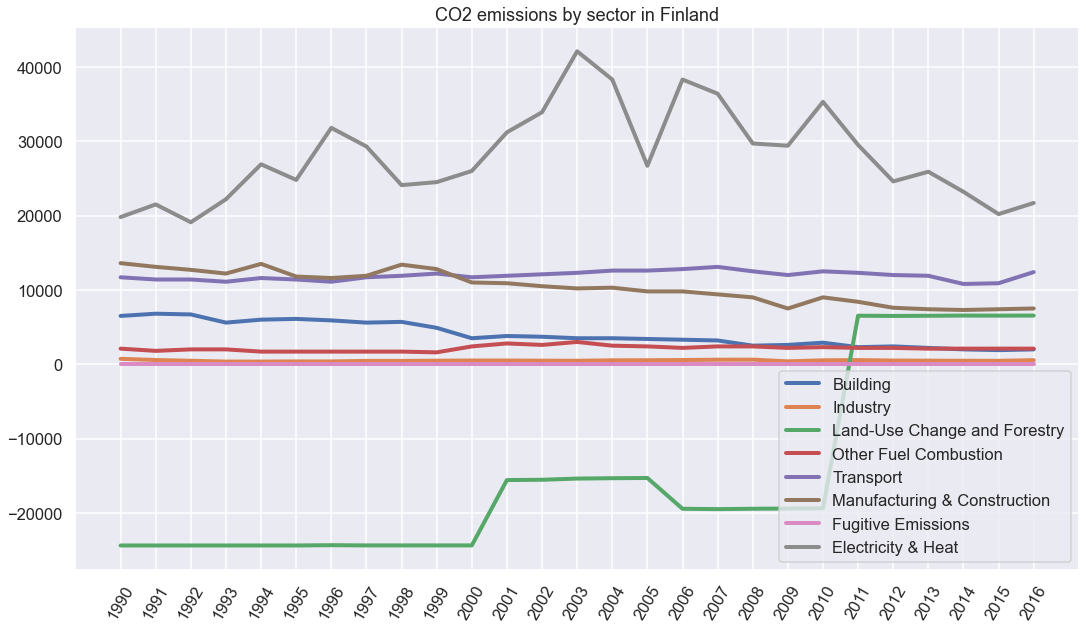

In [53]:
#Visualization: CO2 emissions by sector in FINLAND >>>Slide 15>>>

plt.rcParams["figure.figsize"] = (18,10)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Finland['Year'], CO2_emis_sector_Finland['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Finland['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Finland")
plt.show()

In [47]:
#Creating an object to look at the historical CO2 emissions in DENMARK by sector

CO2_emis_sector_Denmark = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Denmark"]

CO2_emis_sector_Denmark = CO2_emis_sector_Denmark.loc[CO2_emis_sector_Denmark['Year'] > 1964]

CO2_emis_sector_Denmark.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
1269  Denmark  DNK  1990              6400000.0               880000.0   
1270  Denmark  DNK  1991              6500000.0              1090000.0   
1271  Denmark  DNK  1992              5900000.0              1190000.0   
1272  Denmark  DNK  1993              6700000.0              1210000.0   
1273  Denmark  DNK  1994              6000000.0              1190000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
1269                                    50000.0   
1270                                    50000.0   
1271                                    50000.0   
1272                                    50000.0   
1273                                    50000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
1269                           2300000.0              10300000.0   
1270                           2400000.0              10900000.0   
1271                           2300000.0              10900000.0   
1272                           2200000.0              11100000.0   
1273                           2200000.0              11600000.0   

      Manufacturing & Construction (CAIT, 2020)  \
1269                                  5500000.0   
1270                                  5900000.0   
1271                                  5700000.0   
1272                                  5700000.0   
1273                                  5700000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
1269                         220000.0                       26600000.0  
1270                         440000.0                       35500000.0  
1271                         490000.0                       30500000.0  
1272                         380000.0                       32100000.0  
1273                         380000.0                       36200000.0

In [48]:
#Converting the unit of measurement to tons in order to make the graph easier to read - DENMARK

CO2_emis_sector_Denmark['Building (CAIT, 2020)'] = CO2_emis_sector_Denmark['Building (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Industry (CAIT, 2020)'] = CO2_emis_sector_Denmark['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Denmark['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Denmark['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Transport (CAIT, 2020)'] = CO2_emis_sector_Denmark['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Denmark['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Denmark['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Denmark['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Denmark['Electricity & Heat (CAIT, 2020)']/1000


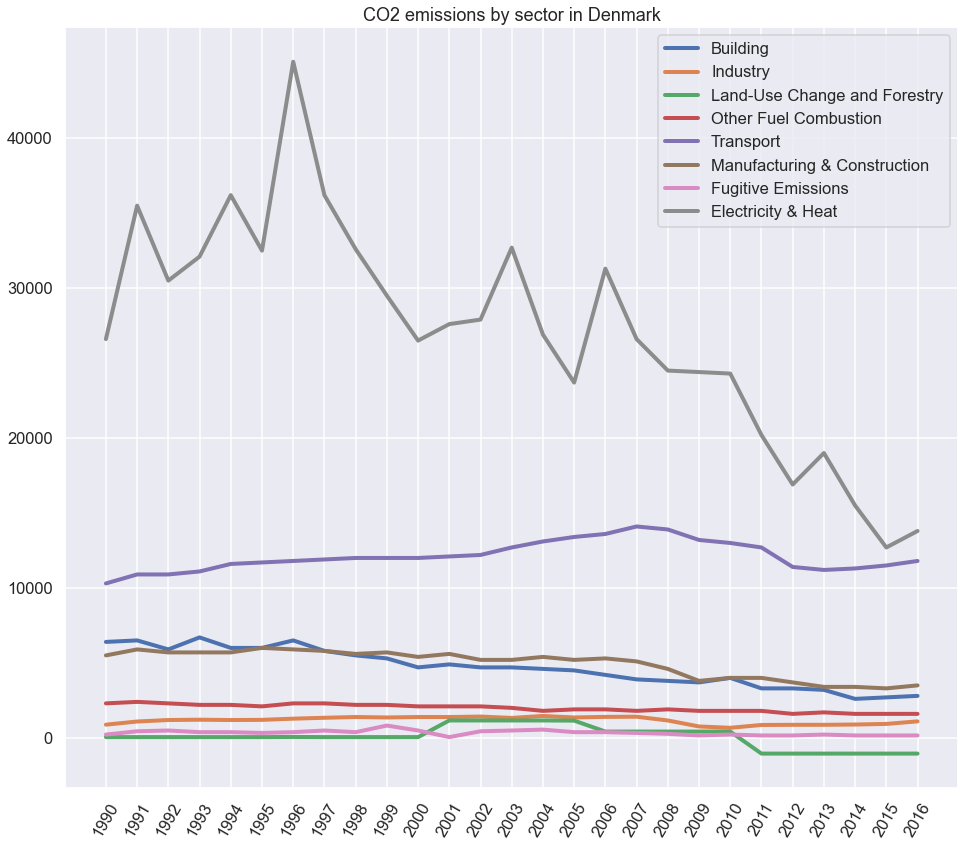

In [54]:
#Visualization: CO2 emissions by sector in DENMARK >>>Slide 15>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Denmark['Year'], CO2_emis_sector_Denmark['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Denmark['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Denmark")
plt.show()

In [55]:
#Creating an object to look at the historical CO2 emissions in SLOVENIA by sector

CO2_emis_sector_Slovenia = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Slovenia"]

CO2_emis_sector_Slovenia = CO2_emis_sector_Slovenia.loc[CO2_emis_sector_Slovenia['Year'] > 1964]

CO2_emis_sector_Slovenia.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
4239  Slovenia  SVN  1990              2000000.0                    NaN   
4240  Slovenia  SVN  1991              2500000.0                    NaN   
4241  Slovenia  SVN  1992              2100000.0               380000.0   
4242  Slovenia  SVN  1993              2400000.0               290000.0   
4243  Slovenia  SVN  1994              2200000.0               380000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
4239                                 -6750000.0   
4240                                 -6750000.0   
4241                                 -6750000.0   
4242                                 -6750000.0   
4243                                 -6750000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
4239                                 0.0               2600000.0   
4240                                 0.0               2500000.0   
4241                                 0.0               2600000.0   
4242                                 0.0               3100000.0   
4243                                 0.0               3400000.0   

      Manufacturing & Construction (CAIT, 2020)  \
4239                                  2600000.0   
4240                                  2300000.0   
4241                                  1800000.0   
4242                                  1800000.0   
4243                                  2000000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
4239                              0.0                        6400000.0  
4240                              0.0                        5500000.0  
4241                              0.0                        6100000.0  
4242                              0.0                        6000000.0  
4243                              0.0                        5600000.0

In [56]:
#Converting the unit of measurement to tons in order to make the graph easier to read - SLOVENIA

CO2_emis_sector_Slovenia['Building (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Building (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Industry (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Transport (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Slovenia['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Slovenia['Electricity & Heat (CAIT, 2020)']/1000


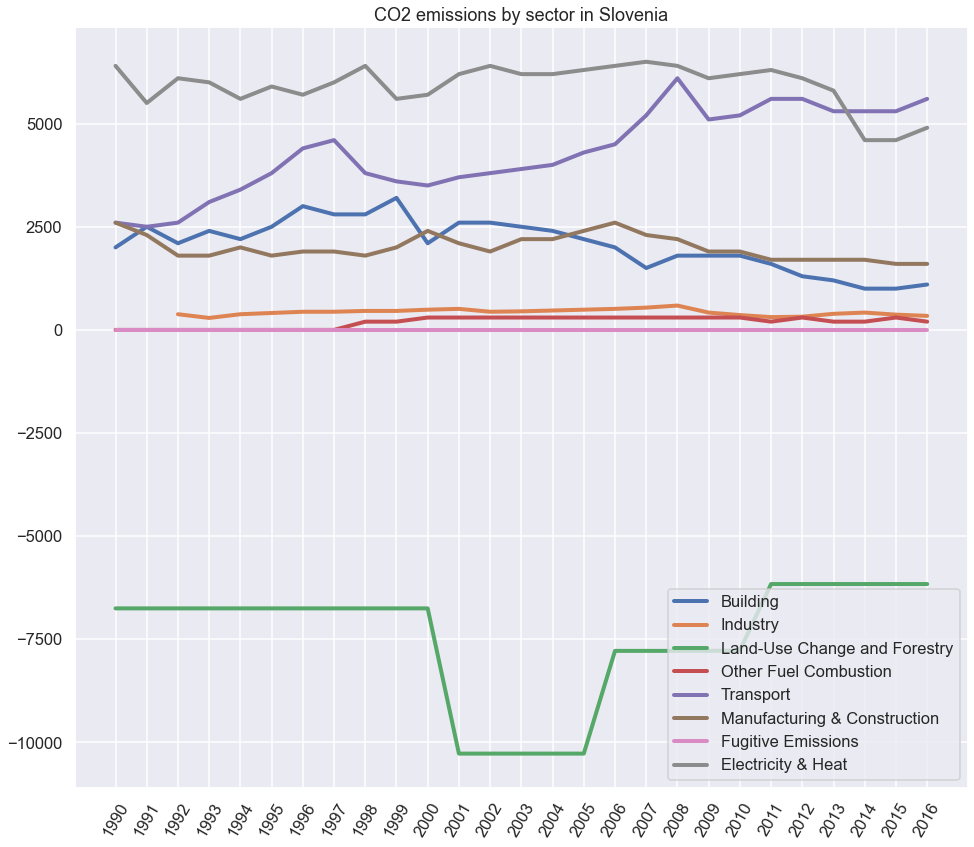

In [57]:
#Visualization: CO2 emissions by sector in SLOVENIA >>>Slide 15>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Slovenia['Year'], CO2_emis_sector_Slovenia['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Slovenia['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Slovenia")
plt.show()

In [58]:
#Creating dataframe energy_consumption since 1950

energy_consump = df2.loc[df2['Year'] > 1950]                                            

In [59]:
#Creating an object to look at the historical energy consumption in FINLAND

energy_consump_Finland = energy_consump.loc[energy_consump['Entity'] == "Finland"]

energy_consump_Finland.head()


Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
1957  Finland  FIN  1965             67.485536                   0.0   
1958  Finland  FIN  1966             81.864732                   0.0   
1959  Finland  FIN  1967             85.772664                   0.0   
1960  Finland  FIN  1968             97.226783                   0.0   
1961  Finland  FIN  1969            112.922299                   0.0   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
1957              20.259837                     0.0               25.982063   
1958              18.804550                     0.0               28.835601   
1959              18.091910                     0.0               32.303617   
1960              21.788636                     0.0               29.135826   
1961              26.138074                     0.0               24.292949   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
1957                       0.0                    0.0                     0.0   
1958                       0.0                    0.0                     0.0   
1959                       0.0                    0.0                     0.0   
1960                       0.0                    0.0                     0.0   
1961                       0.0                    0.0                     0.0   

      Biofuels (TWh)  
1957             0.0  
1958             0.0  
1959             0.0  
1960             0.0  
1961             0.0

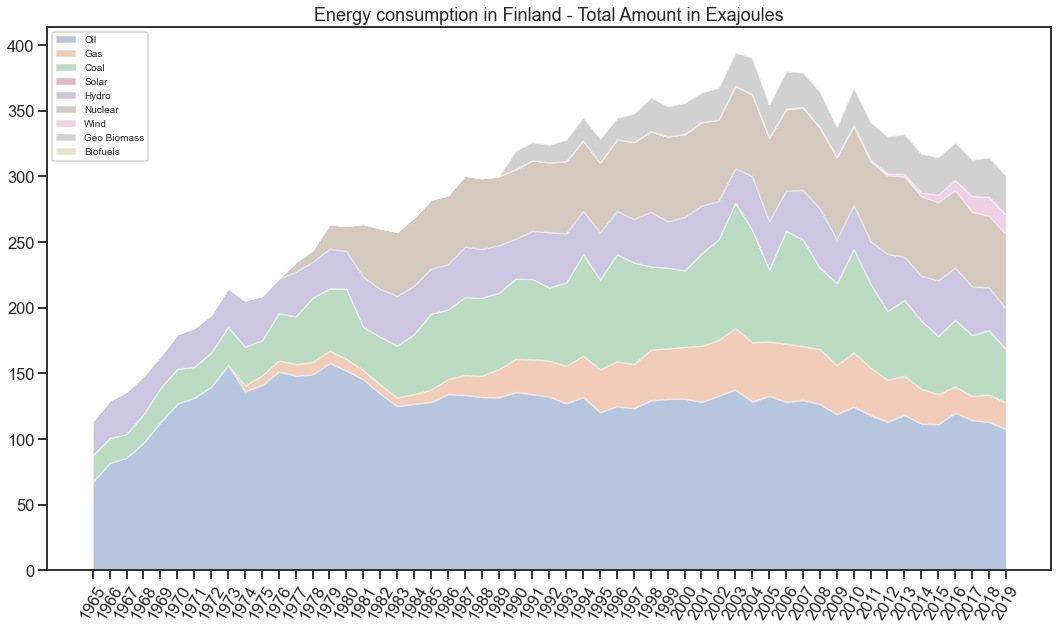

In [60]:
#Visualization: Energy consumption by source in FINLAND >>>Slide 16>>>

#Observation: We can see that 2003 is also the Year with highest energy consumption. In 1990 Finland included Biomass in your
#Energy Matrix, but didn't reduce other sources until 2013. From 2013 the country started a reduction in gas consumption
#and increasing in Wind Energy.

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Finland["Year"], energy_consump_Finland["Oil Consumption - EJ"], energy_consump_Finland["Gas Consumption - EJ"],
              energy_consump_Finland["Coal Consumption - EJ"], energy_consump_Finland["Solar Consumption - EJ"],
              energy_consump_Finland["Hydro Consumption - EJ"], energy_consump_Finland["Nuclear Consumption - EJ"],
              energy_consump_Finland["Wind Consumption - EJ"], energy_consump_Finland["Geo Biomass Other - EJ"],
              energy_consump_Finland["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.title("Energy consumption in Finland - Total Amount in Exajoules")
plt.show()
 

In [61]:
#Creating an object to look at the historical energy consumption in DENMARK

energy_consump_Denmark = energy_consump.loc[energy_consump['Entity'] == "Denmark"]

energy_consump_Denmark.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
1519  Denmark  DNK  1965            123.125544                   0.0   
1520  Denmark  DNK  1966            140.237817                   0.0   
1521  Denmark  DNK  1967            148.316580                   0.0   
1522  Denmark  DNK  1968            161.212114                   0.0   
1523  Denmark  DNK  1969            193.826714                   0.0   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
1519              43.008937                     0.0                0.069445   
1520              48.744858                     0.0                0.072222   
1521              41.733125                     0.0                0.069445   
1522              37.392806                     0.0                0.058333   
1523              34.155011                     0.0                0.061111   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
1519                       0.0                    0.0                     0.0   
1520                       0.0                    0.0                     0.0   
1521                       0.0                    0.0                     0.0   
1522                       0.0                    0.0                     0.0   
1523                       0.0                    0.0                     0.0   

      Biofuels (TWh)  
1519             0.0  
1520             0.0  
1521             0.0  
1522             0.0  
1523             0.0

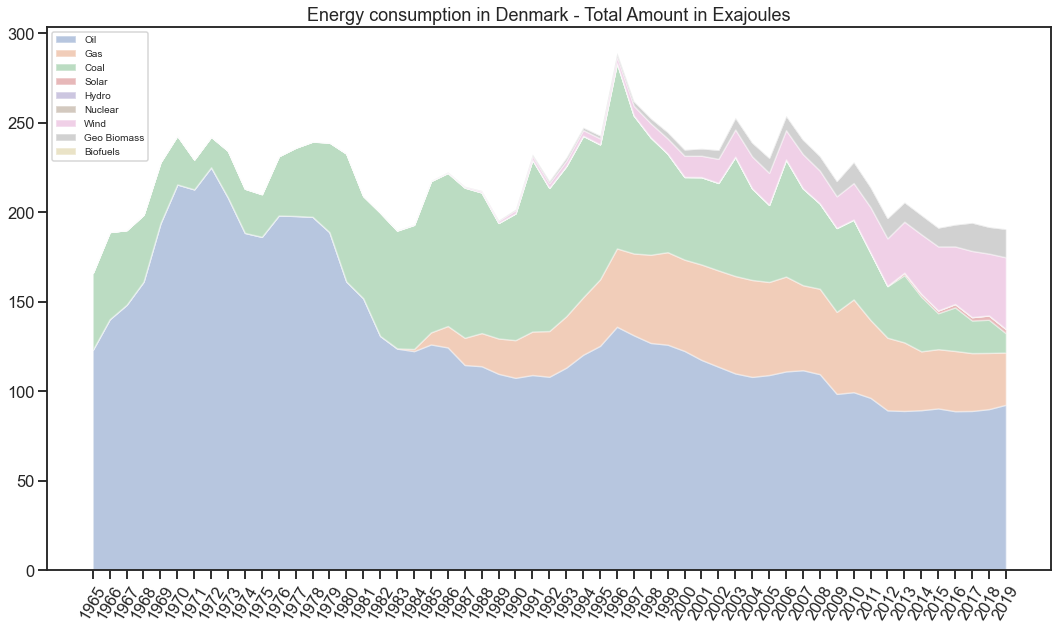

In [62]:
#Visualization: Energy consumption by source in DENMARK >>>Slide 16>>>

#Observation: The peak of Energy Consumption is 1996, as it is in the CO2 emissions. Since 2004 Wind and Biomass energy
#has been increasing their participation in the Energy Matrix, which can be related to the reduction in CO2 emissions.


sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Denmark["Year"], energy_consump_Denmark["Oil Consumption - EJ"], energy_consump_Denmark["Gas Consumption - EJ"],
              energy_consump_Denmark["Coal Consumption - EJ"], energy_consump_Denmark["Solar Consumption - EJ"],
              energy_consump_Denmark["Hydro Consumption - EJ"], energy_consump_Denmark["Nuclear Consumption - EJ"],
              energy_consump_Denmark["Wind Consumption - EJ"], energy_consump_Denmark["Geo Biomass Other - EJ"],
              energy_consump_Denmark["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.title("Energy consumption in Denmark - Total Amount in Exajoules")
plt.show()

In [63]:
#Creating an object to look at the historical energy consumption in SLOVENIA

energy_consump_Slovenia = energy_consump.loc[energy_consump['Entity'] == "Slovenia"]

energy_consump_Slovenia.head()


Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
5043  Slovenia  SVN  1990             20.166143              8.921757   
5044  Slovenia  SVN  1991             19.498450              8.482007   
5045  Slovenia  SVN  1992             18.924438              7.161756   
5046  Slovenia  SVN  1993             22.754923              7.113256   
5047  Slovenia  SVN  1994             24.622344              7.745756   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
5043              18.300983                     0.0                8.261118   
5044              16.708834                     0.0               10.022230   
5045              17.405472                     0.0                9.508341   
5046              16.590208                     0.0                8.430562   
5047              15.452793                     0.0                9.441674   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
5043                 12.838899                    0.0                     0.0   
5044                 13.755567                    0.0                     0.0   
5045                 11.030564                    0.0                     0.0   
5046                 10.988898                    0.0                     0.0   
5047                 12.802788                    0.0                     0.0   

      Biofuels (TWh)  
5043             0.0  
5044             0.0  
5045             0.0  
5046             0.0  
5047             0.0

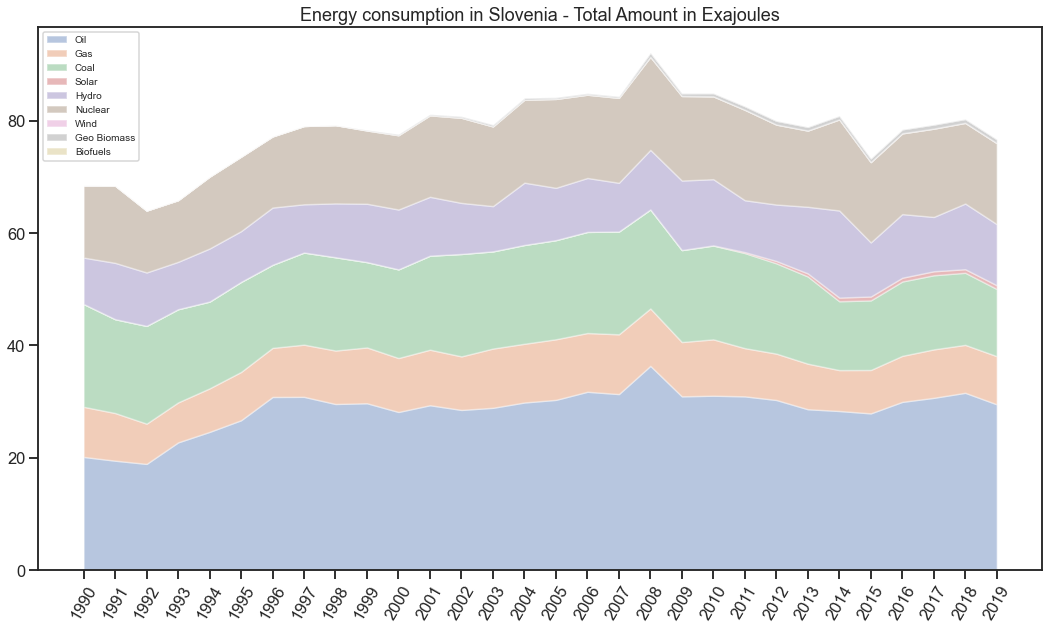

In [64]:
#Visualization: Energy consumption by source in SLOVENIA >>>Slide 16>>>

#Observation: The data available is since 1990 and pattern is the same, the year with the highest CO2 emissions
#is the same with highest energy consumption. The only change in Energy Matrix is the inclusion of Solar Energy since 2012
#but it appears in a very little amount.

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Slovenia["Year"], energy_consump_Slovenia["Oil Consumption - EJ"], energy_consump_Slovenia["Gas Consumption - EJ"],
              energy_consump_Slovenia["Coal Consumption - EJ"], energy_consump_Slovenia["Solar Consumption - EJ"],
              energy_consump_Slovenia["Hydro Consumption - EJ"], energy_consump_Slovenia["Nuclear Consumption - EJ"],
              energy_consump_Slovenia["Wind Consumption - EJ"], energy_consump_Slovenia["Geo Biomass Other - EJ"],
              energy_consump_Slovenia["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1990,2020,step=1), rotation=60)
plt.title("Energy consumption in Slovenia - Total Amount in Exajoules")
plt.show()


In [65]:
#Creating an object to look at the historical CO2 emissions in ESTONIA

CO2_emissions_Estonia = co2_emissions.loc[co2_emissions['Entity'] == "Estonia"]

CO2_emissions_Estonia = CO2_emissions_Estonia.loc[CO2_emissions_Estonia['Year'] > 1964]

CO2_emissions_Estonia.head()


Entity Code  Year  Annual CO2 emissions
18035  Estonia  EST  1965            17188183.0
18036  Estonia  EST  1966            18144305.0
18037  Estonia  EST  1967            18957509.0
18038  Estonia  EST  1968            19475708.0
18039  Estonia  EST  1969            20273247.0

Text(0.5, 1.0, 'CO2 emissions in Estonia (tons)')

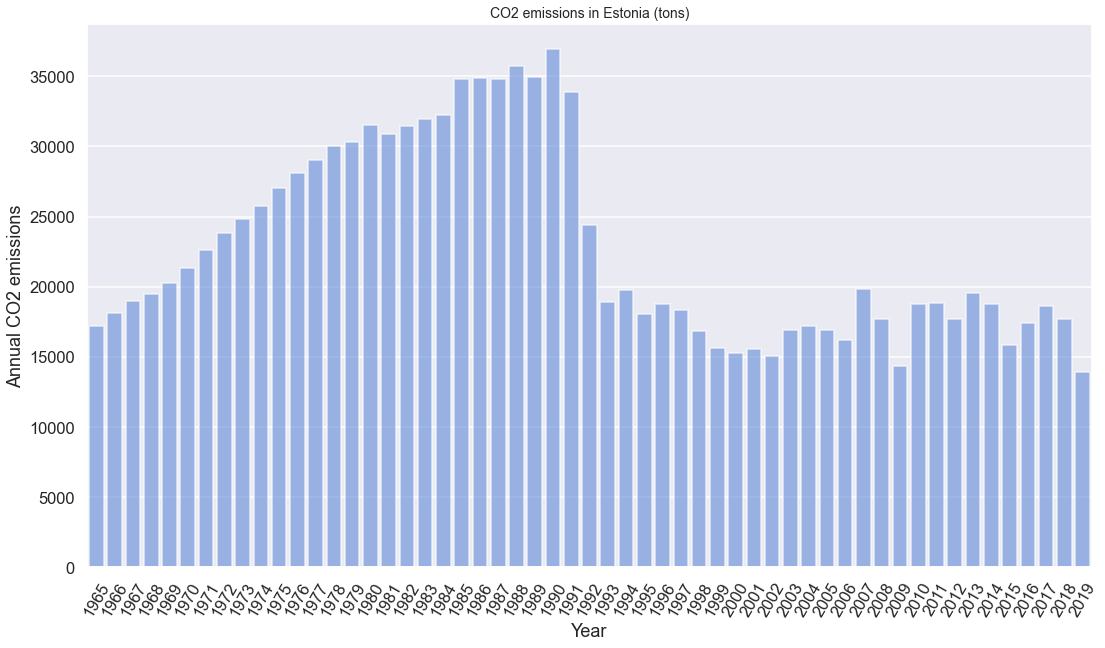

In [66]:
#Visualization: CO2 emissions in ESTONIA (tons) >>>Slide 17>>>

#Observation: We can see strong decrease in CO2 emission since 1991, before the Carbon Tax implementation, but there is no great 
#change after the Carbon Tax.

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figEst = sns.barplot(x="Year", y=((CO2_emissions_Estonia["Annual CO2 emissions"])/1000), data= CO2_emissions_Estonia, color= "cornflowerblue", alpha= 0.7)
figEst.set_xticklabels(figEst.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Estonia (tons)", fontsize=14, fontweight=2)


In [67]:
#Creating an object to look at the historical CO2 emissions in LATVIA

CO2_emissions_Latvia = co2_emissions.loc[co2_emissions['Entity'] == "Latvia"]

CO2_emissions_Latvia = CO2_emissions_Latvia.loc[CO2_emissions_Latvia['Year'] > 1964]

CO2_emissions_Latvia.head()


Entity Code  Year  Annual CO2 emissions
31265  Latvia  LVA  1965             8818782.0
31266  Latvia  LVA  1966             9313069.0
31267  Latvia  LVA  1967             9738283.0
31268  Latvia  LVA  1968            10011982.0
31269  Latvia  LVA  1969            10426948.0

Text(0.5, 1.0, 'CO2 emissions in Latvia (tons)')

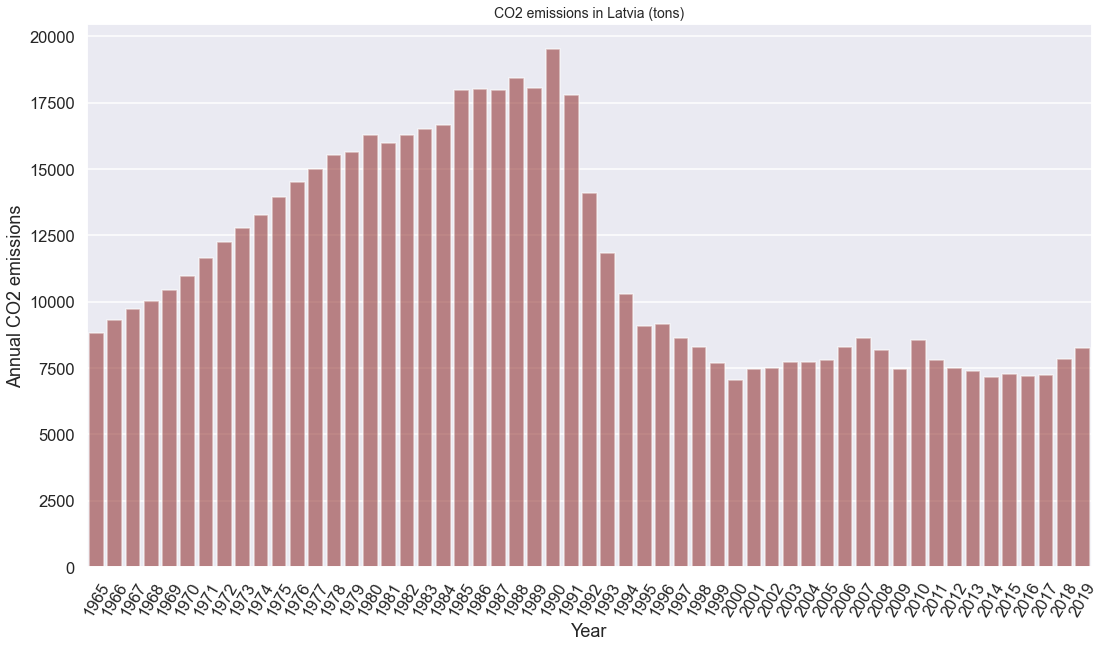

In [96]:
#Visualization: CO2 emissions in LATVIA (tons) >>>Slide 17>>>

#Observation: We can see strong decrease in CO2 emission since 1991, before the Carbon Tax implementation, but there is no great 
#change after the Carbon Tax.  

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figLat = sns.barplot(x="Year", y=((CO2_emissions_Latvia["Annual CO2 emissions"])/1000), data= CO2_emissions_Latvia, color= "brown", alpha= 0.6)
figLat.set_xticklabels(figLat.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Latvia (tons)", fontsize=14, fontweight=2)


In [69]:
#Creating an object to look at the historical CO2 emissions in ESTONIA by sector

CO2_emis_sector_Estonia = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Estonia"]

CO2_emis_sector_Estonia = CO2_emis_sector_Estonia.loc[CO2_emis_sector_Estonia['Year'] > 1964]

CO2_emis_sector_Estonia.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
1512  Estonia  EST  1990               900000.0                    NaN   
1513  Estonia  EST  1991               900000.0                    NaN   
1514  Estonia  EST  1992               600000.0               320000.0   
1515  Estonia  EST  1993               600000.0               230000.0   
1516  Estonia  EST  1994               600000.0               330000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
1512                                 -4070000.0   
1513                                 -4070000.0   
1514                                 -3940000.0   
1515                                 -3940000.0   
1516                                 -3940000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
1512                            900000.0               2400000.0   
1513                            900000.0               2200000.0   
1514                            500000.0               1100000.0   
1515                            500000.0               1200000.0   
1516                            200000.0               1400000.0   

      Manufacturing & Construction (CAIT, 2020)  \
1512                                  4300000.0   
1513                                  3100000.0   
1514                                  2000000.0   
1515                                  1800000.0   
1516                                  1600000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
1512                              0.0                       26700000.0  
1513                              0.0                       24400000.0  
1514                              0.0                       19200000.0  
1515                              0.0                       14100000.0  
1516                              0.0                       13800000.0

In [70]:
#Converting the unit of measurement to tons in order to make the graph easier to read

CO2_emis_sector_Estonia['Building (CAIT, 2020)'] = CO2_emis_sector_Estonia['Building (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Industry (CAIT, 2020)'] = CO2_emis_sector_Estonia['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Estonia['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Estonia['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Transport (CAIT, 2020)'] = CO2_emis_sector_Estonia['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Estonia['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Estonia['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Estonia['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Estonia['Electricity & Heat (CAIT, 2020)']/1000


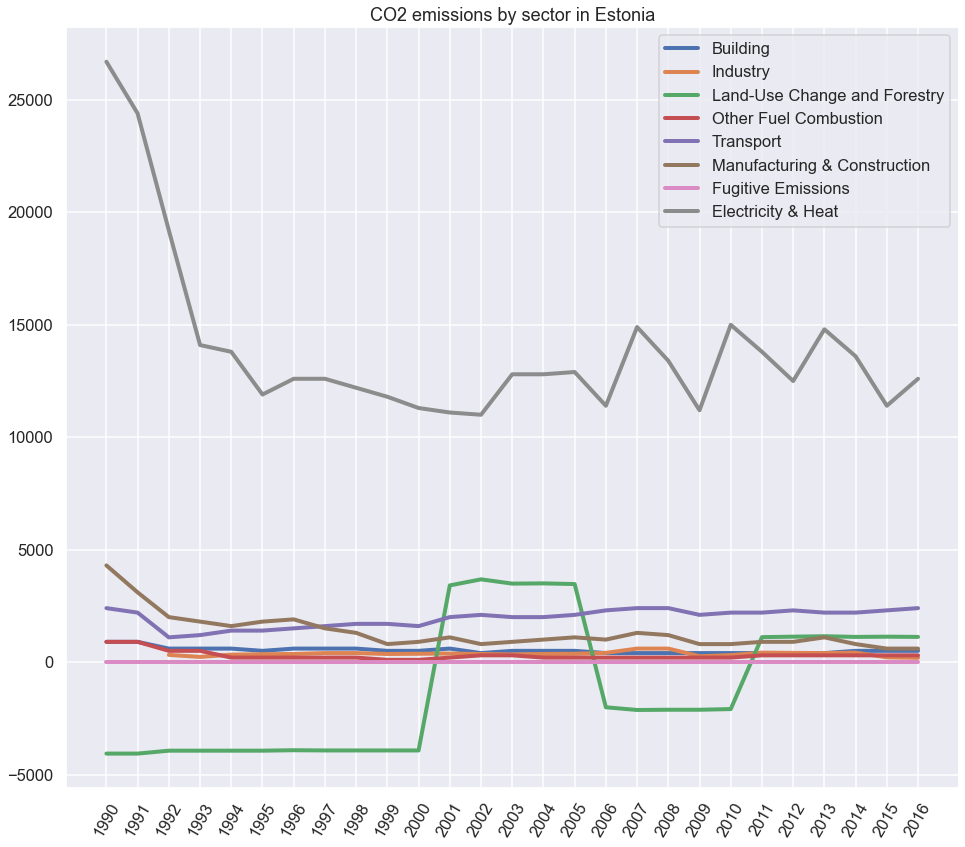

In [71]:
#Visualization: CO2 emissions by sector in ESTONIA >>>Slide 18>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Estonia['Year'], CO2_emis_sector_Estonia['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Estonia['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Estonia")
plt.show()

In [72]:
#Creating an object to look at the historical CO2 emissions in LATVIA by sector

CO2_emis_sector_Latvia = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Latvia"]

CO2_emis_sector_Latvia = CO2_emis_sector_Latvia.loc[CO2_emis_sector_Latvia['Year'] > 1964]

CO2_emis_sector_Latvia.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
2538  Latvia  LVA  1990              2500000.0                    NaN   
2539  Latvia  LVA  1991              2900000.0                    NaN   
2540  Latvia  LVA  1992              2100000.0               140000.0   
2541  Latvia  LVA  1993              2100000.0                20000.0   
2542  Latvia  LVA  1994              1700000.0                80000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
2538                                -13090000.0   
2539                                -13090000.0   
2540                                -12680000.0   
2541                                -12680000.0   
2542                                -12680000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
2538                            700000.0               3100000.0   
2539                            800000.0               2800000.0   
2540                            600000.0               2400000.0   
2541                            500000.0               2300000.0   
2542                            600000.0               2100000.0   

      Manufacturing & Construction (CAIT, 2020)  \
2538                                  2600000.0   
2539                                  1800000.0   
2540                                  1600000.0   
2541                                  1600000.0   
2542                                  1400000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
2538                              0.0                        9900000.0  
2539                              0.0                        8900000.0  
2540                              0.0                        7200000.0  
2541                              0.0                        5300000.0  
2542                              0.0                        4400000.0

In [73]:
#Converting the unit of measurement to tons in order to make the graph easier to read

CO2_emis_sector_Latvia['Building (CAIT, 2020)'] = CO2_emis_sector_Latvia['Building (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Industry (CAIT, 2020)'] = CO2_emis_sector_Latvia['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Latvia['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Latvia['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Transport (CAIT, 2020)'] = CO2_emis_sector_Latvia['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Latvia['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Latvia['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Latvia['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Latvia['Electricity & Heat (CAIT, 2020)']/1000


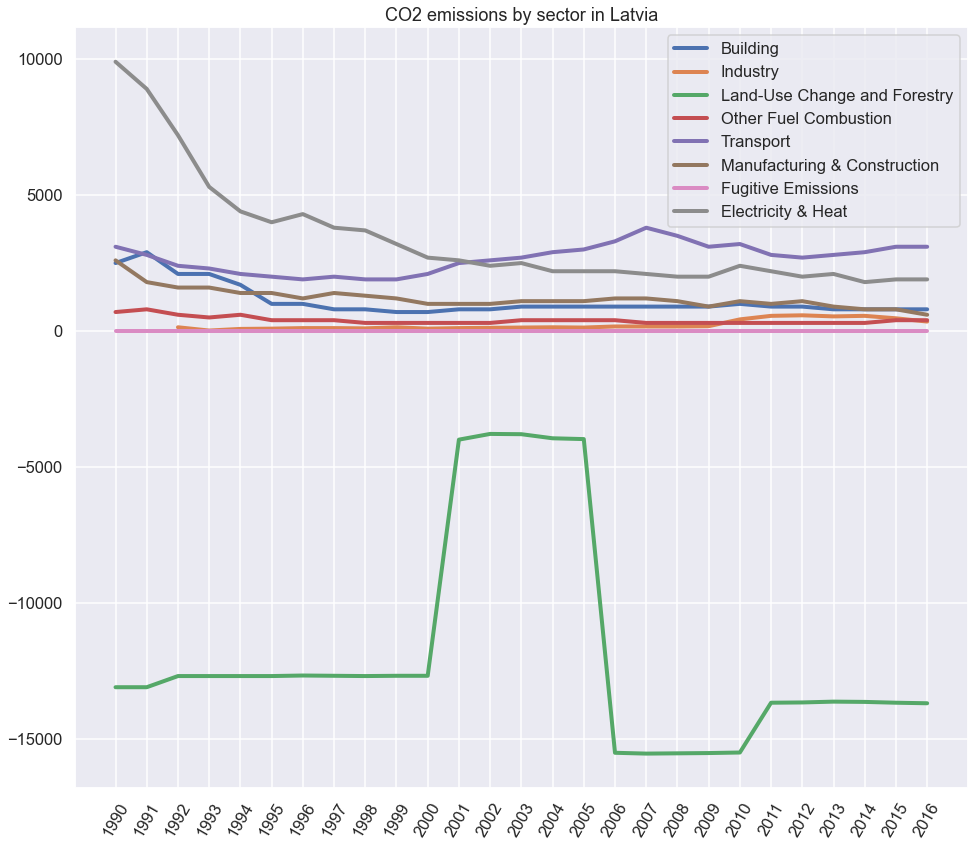

In [74]:
#Visualization: CO2 emissions by sector in LATVIA >>>Slide 18>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Latvia['Year'], CO2_emis_sector_Latvia['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Latvia['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Latvia")
plt.show()

In [75]:
#Creating an object to look at the historical energy consumption in ESTONIA

energy_consump_Estonia = energy_consump.loc[energy_consump['Entity'] == "Estonia"]

energy_consump_Estonia.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
1790  Estonia  EST  1985             40.446108             10.486242   
1791  Estonia  EST  1986             40.011010              9.530367   
1792  Estonia  EST  1987             40.409827             10.325352   
1793  Estonia  EST  1988             40.758336             11.120338   
1794  Estonia  EST  1989             42.034223             11.120338   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
1790              67.520357                     0.0                     0.0   
1791              68.341571                     0.0                     0.0   
1792              68.931266                     0.0                     0.0   
1793              65.754285                     0.0                     0.0   
1794              68.070593                     0.0                     0.0   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
1790                       0.0                    0.0                     0.0   
1791                       0.0                    0.0                     0.0   
1792                       0.0                    0.0                     0.0   
1793                       0.0                    0.0                     0.0   
1794                       0.0                    0.0                     0.0   

      Biofuels (TWh)  
1790             0.0  
1791             0.0  
1792             0.0  
1793             0.0  
1794             0.0

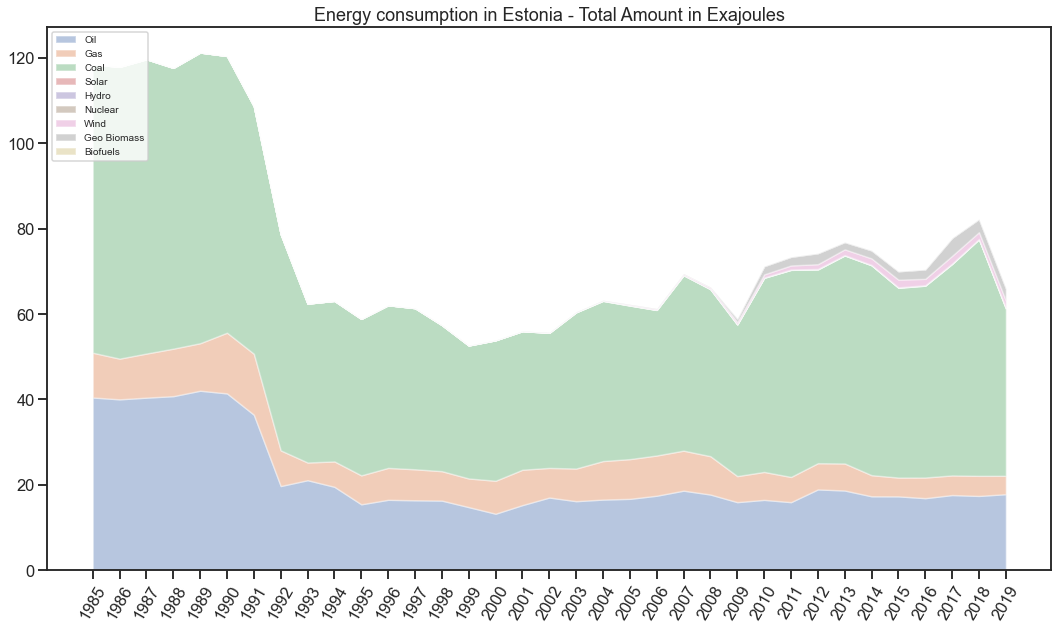

In [76]:
#Visualization: Energy consumption by source in ESTONIA >>>Slide 19>>>

#Observation: The data available is since 1985 and the pattern is the same, the country presented a strong reduction in 
#energy consumption in 1992, before the Carbon Tax implementation, and remained in the same level.

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Estonia["Year"], energy_consump_Estonia["Oil Consumption - EJ"], energy_consump_Estonia["Gas Consumption - EJ"],
              energy_consump_Estonia["Coal Consumption - EJ"], energy_consump_Estonia["Solar Consumption - EJ"],
              energy_consump_Estonia["Hydro Consumption - EJ"], energy_consump_Estonia["Nuclear Consumption - EJ"],
              energy_consump_Estonia["Wind Consumption - EJ"], energy_consump_Estonia["Geo Biomass Other - EJ"],
              energy_consump_Estonia["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1985,2020,step=1), rotation=60)
plt.title("Energy consumption in Estonia - Total Amount in Exajoules")
plt.show()


In [77]:
#Creating an object to look at the historical energy consumption in LATVIA

energy_consump_Latvia = energy_consump.loc[energy_consump['Entity'] == "Latvia"]

energy_consump_Latvia.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
3026  Latvia  LVA  1985             67.932442             21.104982   
3027  Latvia  LVA  1986             57.170355             22.070322   
3028  Latvia  LVA  1987             46.473747             22.955217   
3029  Latvia  LVA  1988             41.671118             24.720275   
3030  Latvia  LVA  1989             41.656287             24.720275   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
3026               8.443387                     0.0                8.274106   
3027              10.654717                     0.0                8.335486   
3028               9.755950                     0.0               10.275113   
3029               9.792235                     0.0                8.335486   
3030               7.996794                     0.0               10.017315   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
3026                       0.0                    0.0                     0.0   
3027                       0.0                    0.0                     0.0   
3028                       0.0                    0.0                     0.0   
3029                       0.0                    0.0                     0.0   
3030                       0.0                    0.0                     0.0   

      Biofuels (TWh)  
3026             0.0  
3027             0.0  
3028             0.0  
3029             0.0  
3030             0.0

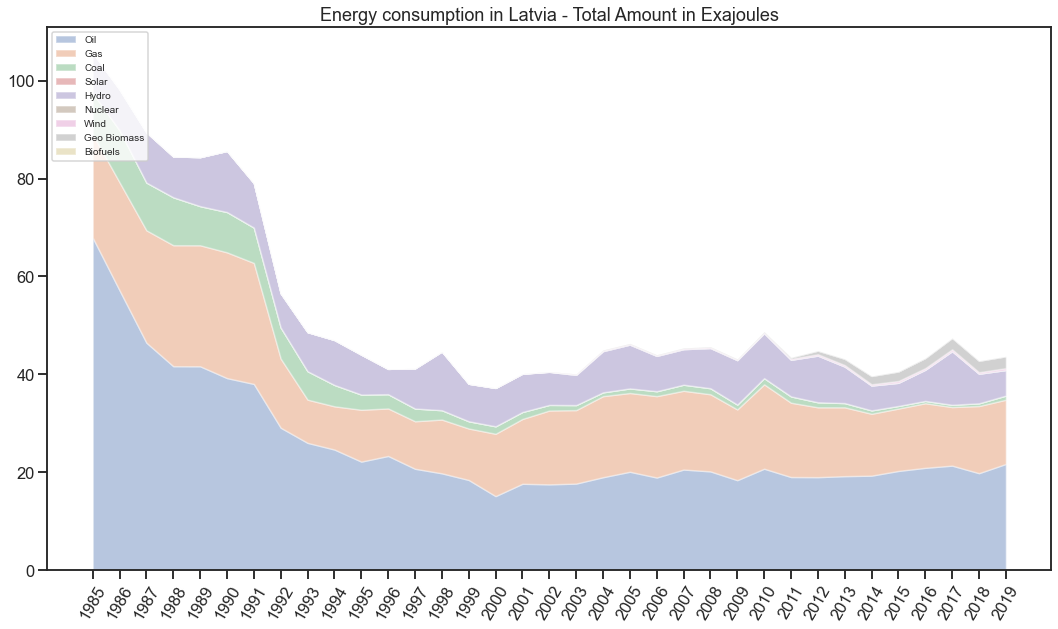

In [78]:
#Visualization: Energy consumption by source in LATVIA >>>Slide 19>>>

#Observation: The data available is since 1985 and the pattern is the same, the country presented a strong reduction in 
#energy consumption in 1992, before the Carbon Tax implementation, and remained in the same level.

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Latvia["Year"], energy_consump_Latvia["Oil Consumption - EJ"], energy_consump_Latvia["Gas Consumption - EJ"],
              energy_consump_Latvia["Coal Consumption - EJ"], energy_consump_Latvia["Solar Consumption - EJ"],
              energy_consump_Latvia["Hydro Consumption - EJ"], energy_consump_Latvia["Nuclear Consumption - EJ"],
              energy_consump_Latvia["Wind Consumption - EJ"], energy_consump_Latvia["Geo Biomass Other - EJ"],
              energy_consump_Latvia["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1985,2020,step=1), rotation=60)
plt.title("Energy consumption in Latvia - Total Amount in Exajoules")
plt.show()


In [79]:
#Creating an object to look at the historical CO2 emissions in POLAND

CO2_emissions_Poland = co2_emissions.loc[co2_emissions['Entity'] == "Poland"]

CO2_emissions_Poland = CO2_emissions_Poland.loc[CO2_emissions_Poland['Year'] > 1964]

CO2_emissions_Poland.head()


Entity Code  Year  Annual CO2 emissions
45575  Poland  POL  1965           246980862.0
45576  Poland  POL  1966           252430992.0
45577  Poland  POL  1967           259025458.0
45578  Poland  POL  1968           275801012.0
45579  Poland  POL  1969           293365308.0

Text(0.5, 1.0, 'CO2 emissions in Poland (tons)')

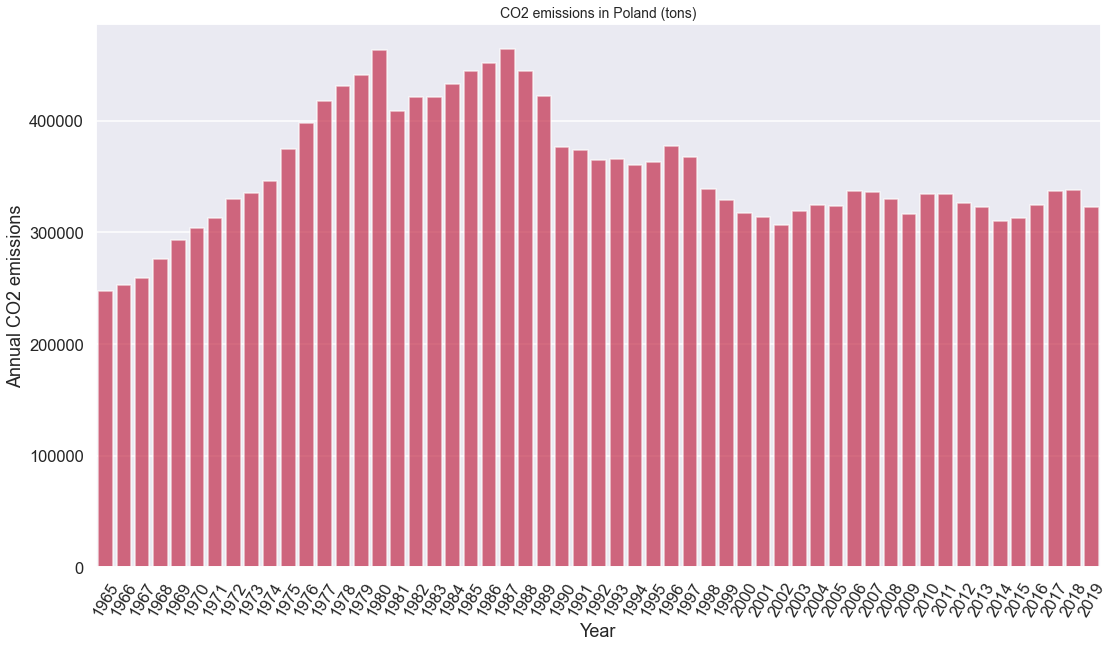

In [97]:
#Visualization: CO2 emissions in POLAND (tons) >>>Slide 20>>>

#Observation: In the year of the Carbon Tax implementation the country presented a hard decrease in CO2 emissions and 
#has stabilized the CO2 emissions since then. 

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figPol = sns.barplot(x="Year", y=((CO2_emissions_Poland["Annual CO2 emissions"])/1000), data= CO2_emissions_Poland, color= "crimson", alpha= 0.7)
figPol.set_xticklabels(figPol.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Poland (tons)", fontsize=14, fontweight=2)

In [81]:
#Creating an object to look at the historical CO2 emissions in SWEDEN

CO2_emissions_Sweden = co2_emissions.loc[co2_emissions['Entity'] == "Sweden"]

CO2_emissions_Sweden = CO2_emissions_Sweden.loc[CO2_emissions_Sweden['Year'] > 1964]

CO2_emissions_Sweden.head()


Entity Code  Year  Annual CO2 emissions
55025  Sweden  SWE  1965            62562213.0
55026  Sweden  SWE  1966            72517360.0
55027  Sweden  SWE  1967            68929739.0
55028  Sweden  SWE  1968            77606031.0
55029  Sweden  SWE  1969            86381133.0

Text(0.5, 1.0, 'CO2 emissions in Sweden (tons)')

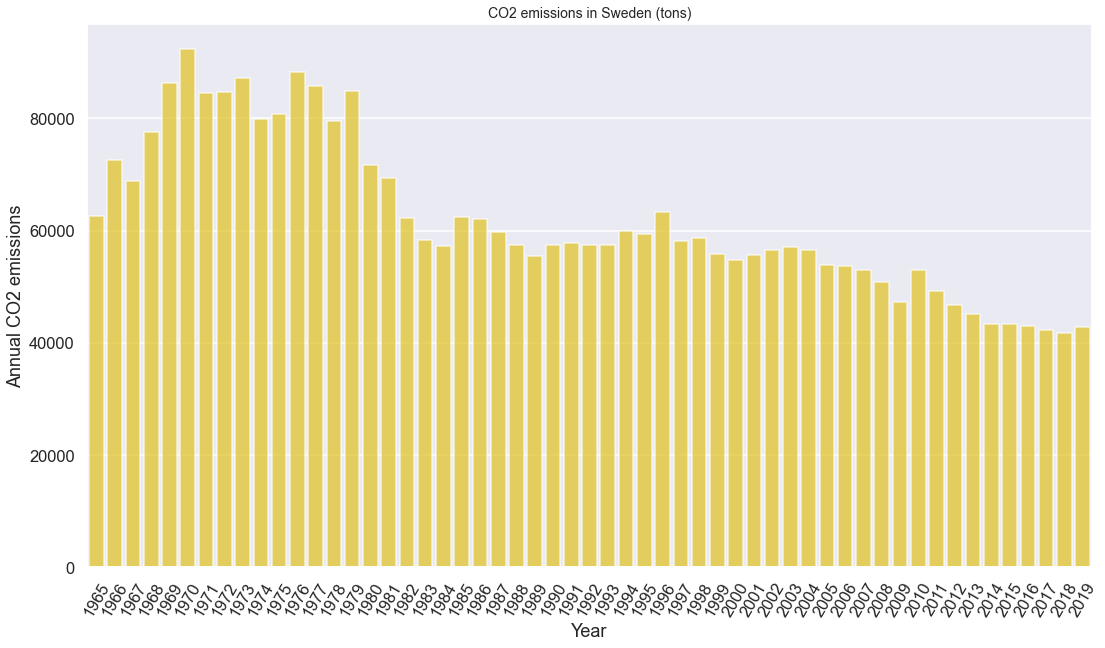

In [98]:
#Visualization: CO2 emissions in SWEDEN (tons) >>>Slide 20>>>

#Observation: The CO2 emissions is almost stable after Carbon Tax was implemented.  

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figSwe = sns.barplot(x="Year", y=((CO2_emissions_Sweden["Annual CO2 emissions"])/1000), data= CO2_emissions_Sweden, color= "gold", alpha= 0.7)
figSwe.set_xticklabels(figSwe.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Sweden (tons)", fontsize=14, fontweight=2)


In [83]:
#Creating an object to look at the historical CO2 emissions in IRELAND

CO2_emissions_Ireland = co2_emissions.loc[co2_emissions['Entity'] == "Ireland"]

CO2_emissions_Ireland = CO2_emissions_Ireland.loc[CO2_emissions_Ireland['Year'] > 1964]

CO2_emissions_Ireland.head()


Entity Code  Year  Annual CO2 emissions
27485  Ireland  IRL  1965            13717431.0
27486  Ireland  IRL  1966            15094858.0
27487  Ireland  IRL  1967            16394834.0
27488  Ireland  IRL  1968            17801571.0
27489  Ireland  IRL  1969            18494395.0

Text(0.5, 1.0, 'CO2 emissions in Ireland (tons)')

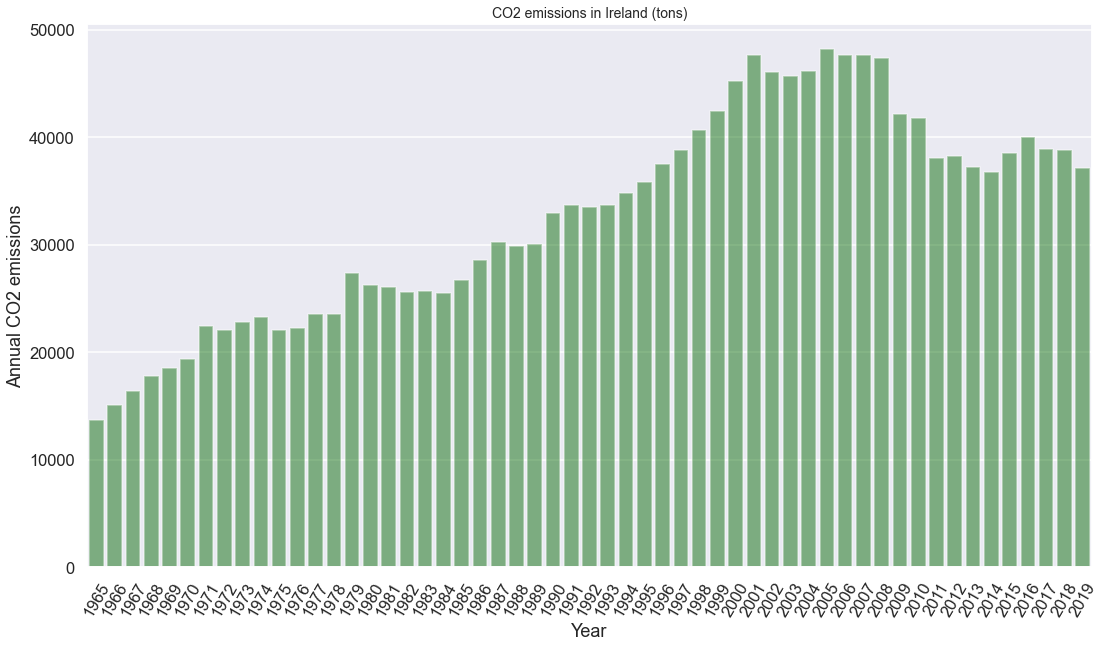

In [99]:
#Visualization: CO2 emissions in IRELAND (tons) >>>Slide 20>>>

#Observation: The CO2 emissions is almost stable after Carbon Tax was implemented.  

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figIre = sns.barplot(x="Year", y=((CO2_emissions_Ireland["Annual CO2 emissions"])/1000), data= CO2_emissions_Ireland, color= "green", alpha= 0.5)
figIre.set_xticklabels(figIre.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Ireland (tons)", fontsize=14, fontweight=2)

In [85]:
#Creating an object to look at the historical CO2 emissions in POLAND by sector

CO2_emis_sector_Poland = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Poland"]

CO2_emis_sector_Poland = CO2_emis_sector_Poland.loc[CO2_emis_sector_Poland['Year'] > 1964]

CO2_emis_sector_Poland.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
3753  Poland  POL  1990             45000000.0              5450000.0   
3754  Poland  POL  1991             53000000.0              5410000.0   
3755  Poland  POL  1992             54800000.0              5540000.0   
3756  Poland  POL  1993             56600000.0              5150000.0   
3757  Poland  POL  1994             48900000.0              6640000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
3753                                -15660000.0   
3754                                -15660000.0   
3755                                -15660000.0   
3756                                -15660000.0   
3757                                -15660000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
3753                           8000000.0              20200000.0   
3754                           9700000.0              21100000.0   
3755                          10700000.0              21500000.0   
3756                          12700000.0              20900000.0   
3757                          13700000.0              21500000.0   

      Manufacturing & Construction (CAIT, 2020)  \
3753                                 42700000.0   
3754                                 39500000.0   
3755                                 36600000.0   
3756                                 47500000.0   
3757                                 48500000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
3753                              0.0                      228900000.0  
3754                              0.0                      222900000.0  
3755                              0.0                      214400000.0  
3756                              0.0                      201200000.0  
3757                              0.0                      200400000.0

In [86]:
#Converting the unit of measurement to tons in order to make the graph easier to read

CO2_emis_sector_Poland['Building (CAIT, 2020)'] = CO2_emis_sector_Poland['Building (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Industry (CAIT, 2020)'] = CO2_emis_sector_Poland['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Poland['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Poland['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Transport (CAIT, 2020)'] = CO2_emis_sector_Poland['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Poland['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Poland['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Poland['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Poland['Electricity & Heat (CAIT, 2020)']/1000


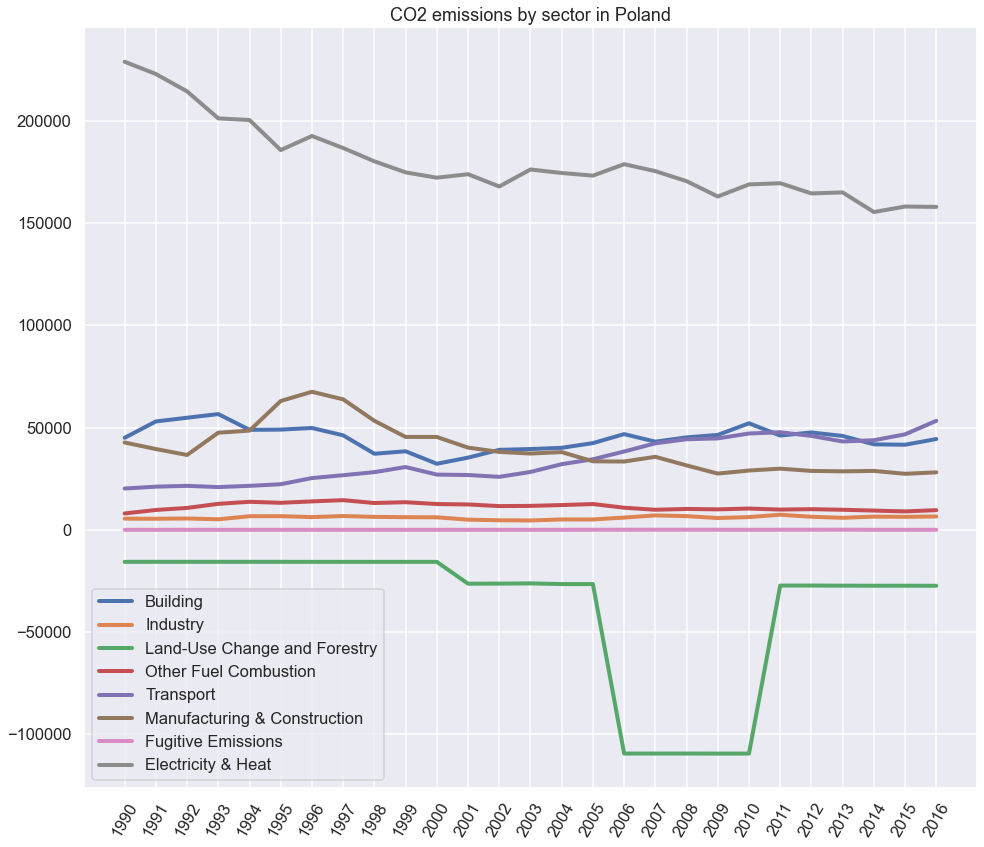

In [87]:
#Visualization: CO2 emissions by sector in POLAND >>>Slide 21>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Poland['Year'], CO2_emis_sector_Poland['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Poland['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Poland")
plt.show()

In [88]:
#Creating an object to look at the historical CO2 emissions in SWEDEN by sector

CO2_emis_sector_Sweden = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Sweden"]

CO2_emis_sector_Sweden = CO2_emis_sector_Sweden.loc[CO2_emis_sector_Sweden['Year'] > 1964]

CO2_emis_sector_Sweden.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
4509  Sweden  SWE  1990              9200000.0              1270000.0   
4510  Sweden  SWE  1991              8800000.0              1140000.0   
4511  Sweden  SWE  1992              9100000.0              1090000.0   
4512  Sweden  SWE  1993              8600000.0              1090000.0   
4513  Sweden  SWE  1994              8900000.0              1110000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
4509                                -20430000.0   
4510                                -20430000.0   
4511                                -20430000.0   
4512                                -20430000.0   
4513                                -20430000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
4509                           1400000.0              19900000.0   
4510                           1400000.0              19600000.0   
4511                           1400000.0              20300000.0   
4512                           1200000.0              19400000.0   
4513                           1200000.0              20100000.0   

      Manufacturing & Construction (CAIT, 2020)  \
4509                                 11900000.0   
4510                                 11400000.0   
4511                                 13300000.0   
4512                                 14400000.0   
4513                                 14600000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
4509                              0.0                        9700000.0  
4510                              0.0                       11900000.0  
4511                              0.0                       11700000.0  
4512                              0.0                       11900000.0  
4513                              0.0                       12500000.0

In [89]:
#Converting the unit of measurement to tons in order to make the graph easier to read

CO2_emis_sector_Sweden['Building (CAIT, 2020)'] = CO2_emis_sector_Sweden['Building (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Industry (CAIT, 2020)'] = CO2_emis_sector_Sweden['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Sweden['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Sweden['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Transport (CAIT, 2020)'] = CO2_emis_sector_Sweden['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Sweden['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Sweden['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Sweden['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Sweden['Electricity & Heat (CAIT, 2020)']/1000


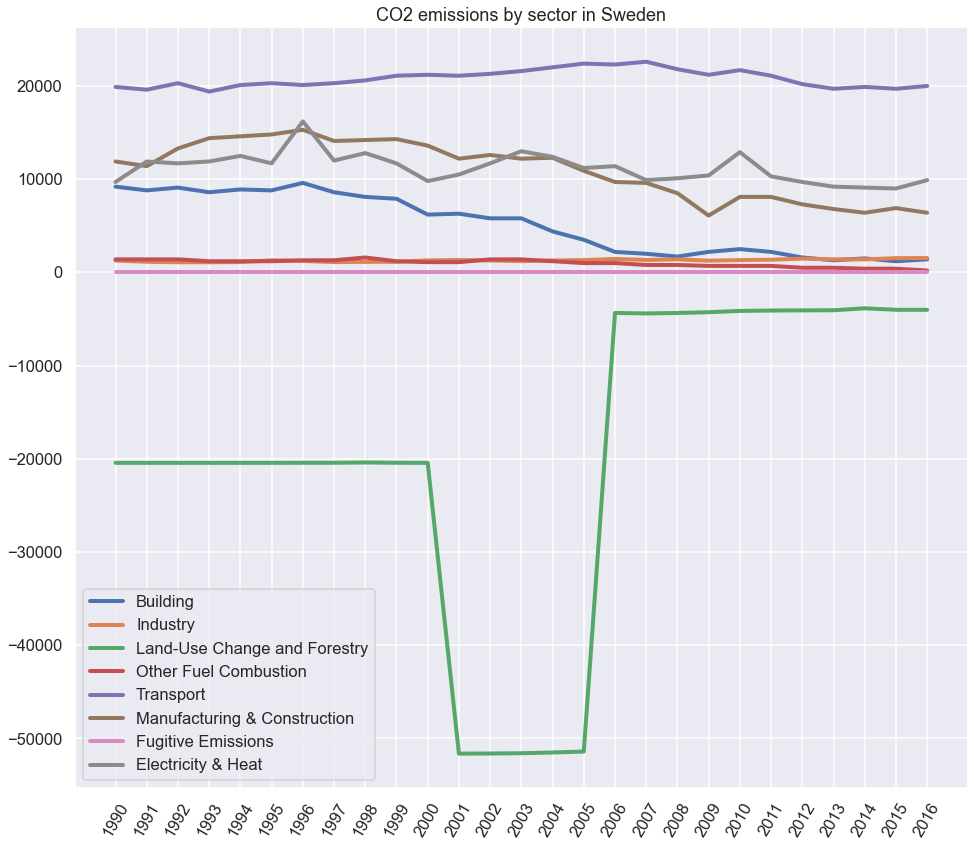

In [90]:
#Visualization: CO2 emissions by sector in SWEDEN >>>Slide 21>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Sweden['Year'], CO2_emis_sector_Sweden['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Sweden['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Sweden")
plt.show()

In [91]:
#Creating an object to look at the historical CO2 emissions in IRELAND by sector

CO2_emis_sector_Ireland = co2_emissions_sector.loc[co2_emissions_sector['Entity'] == "Ireland"]

CO2_emis_sector_Ireland = CO2_emis_sector_Ireland.loc[CO2_emis_sector_Ireland['Year'] > 1964]

CO2_emis_sector_Ireland.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
2214  Ireland  IRL  1990              9700000.0               880000.0   
2215  Ireland  IRL  1991              9400000.0               780000.0   
2216  Ireland  IRL  1992              8700000.0               750000.0   
2217  Ireland  IRL  1993              8600000.0               730000.0   
2218  Ireland  IRL  1994              8700000.0               860000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
2214                                 -2190000.0   
2215                                 -2190000.0   
2216                                 -2190000.0   
2217                                 -2190000.0   
2218                                 -2190000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
2214                            700000.0               4900000.0   
2215                            700000.0               5100000.0   
2216                            700000.0               5500000.0   
2217                            700000.0               5500000.0   
2218                            800000.0               5800000.0   

      Manufacturing & Construction (CAIT, 2020)  \
2214                                  4000000.0   
2215                                  4100000.0   
2216                                  3800000.0   
2217                                  4000000.0   
2218                                  4200000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
2214                              0.0                       10800000.0  
2215                              0.0                       11400000.0  
2216                              0.0                       12100000.0  
2217                              0.0                       12100000.0  
2218                              0.0                       12700000.0

In [92]:
#Converting the unit of measurement to tons in order to make the graph easier to read

CO2_emis_sector_Ireland['Building (CAIT, 2020)'] = CO2_emis_sector_Ireland['Building (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Industry (CAIT, 2020)'] = CO2_emis_sector_Ireland['Industry (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Land-Use Change and Forestry (CAIT, 2020)'] = CO2_emis_sector_Ireland['Land-Use Change and Forestry (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Other Fuel Combustion (CAIT, 2020)'] = CO2_emis_sector_Ireland['Other Fuel Combustion (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Transport (CAIT, 2020)'] = CO2_emis_sector_Ireland['Transport (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Manufacturing & Construction (CAIT, 2020)'] = CO2_emis_sector_Ireland['Manufacturing & Construction (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Fugitive Emissions (CAIT, 2020)'] = CO2_emis_sector_Ireland['Fugitive Emissions (CAIT, 2020)']/1000
CO2_emis_sector_Ireland['Electricity & Heat (CAIT, 2020)'] = CO2_emis_sector_Ireland['Electricity & Heat (CAIT, 2020)']/1000


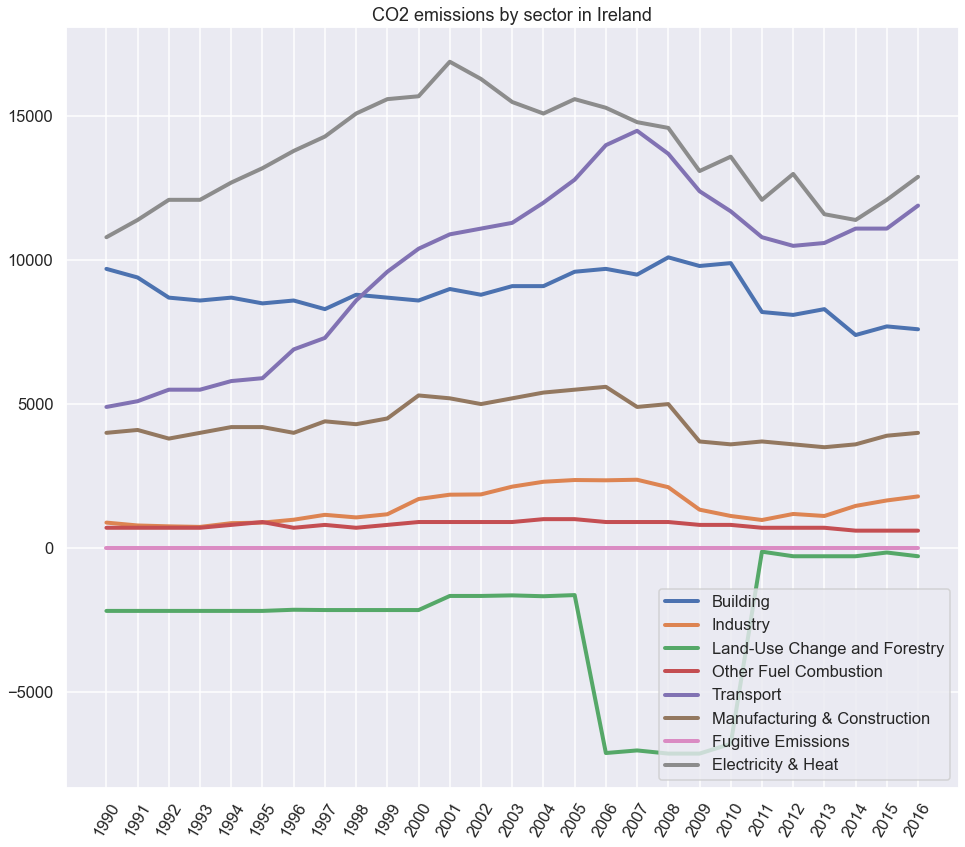

In [93]:
#Visualization: CO2 emissions by sector in IRELAND >>>Slide 21>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(CO2_emis_sector_Ireland['Year'], CO2_emis_sector_Ireland['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (CO2_emis_sector_Ireland['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Ireland")
plt.show()

In [94]:
#Creating an object to look at the historial energy consumption in Poland

energy_consump_Poland = energy_consump.loc[energy_consump['Entity'] == "Poland"]

energy_consump_Poland.head()


Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
4605  Poland  POL  1965             64.424810             17.132014   
4606  Poland  POL  1966             67.008581             20.365766   
4607  Poland  POL  1967             72.720425             24.887770   
4608  Poland  POL  1968             90.988153             34.192027   
4609  Poland  POL  1969            100.078108             47.404288   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
4605             691.764583                     0.0                2.488891   
4606             701.033701                     0.0                2.488891   
4607             713.722041                     0.0                2.658335   
4608             748.065458                     0.0                2.791669   
4609             785.921139                     0.0                2.250002   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
4605                       0.0                    0.0                0.072222   
4606                       0.0                    0.0                0.105556   
4607                       0.0                    0.0                0.122222   
4608                       0.0                    0.0                0.130556   
4609                       0.0                    0.0                0.233334   

      Biofuels (TWh)  
4605             0.0  
4606             0.0  
4607             0.0  
4608             0.0  
4609             0.0

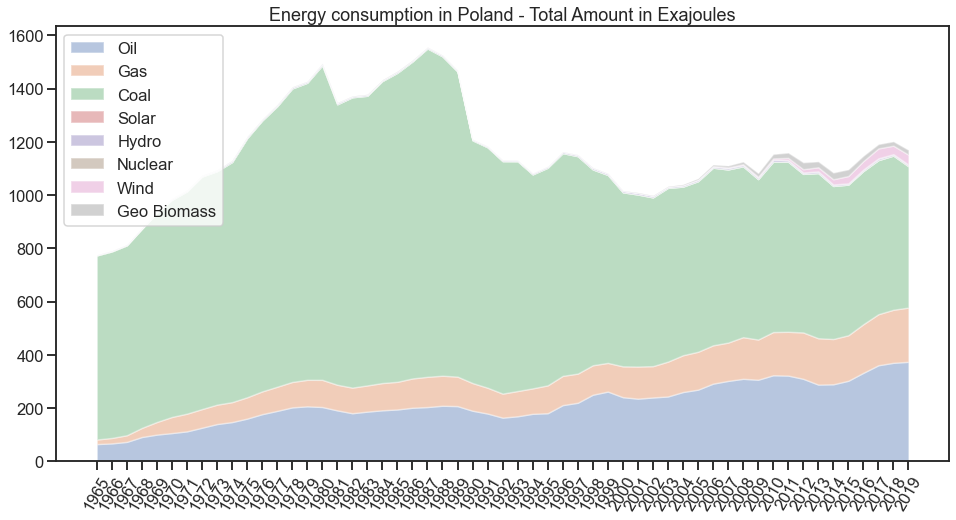

In [103]:
#Visualization: Energy consumption by source in Poland >>>Slide 22>>>

#Observation: The country presented a strong reduction in energy consumption in 1990, the year of the Carbon Tax implementation.


sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 16,8
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Poland["Year"], energy_consump_Poland["Oil Consumption - EJ"], energy_consump_Poland["Gas Consumption - EJ"],
              energy_consump_Poland["Coal Consumption - EJ"], energy_consump_Poland["Solar Consumption - EJ"],
              energy_consump_Poland["Hydro Consumption - EJ"], energy_consump_Poland["Nuclear Consumption - EJ"],
              energy_consump_Poland["Wind Consumption - EJ"], energy_consump_Poland["Geo Biomass Other - EJ"],
              labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass'], alpha= 0.4)

plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.legend(loc='upper left')
plt.title("Energy consumption in Poland - Total Amount in Exajoules")
plt.show()

In [104]:
#Creating an object to look at the historical energy consumption in SWEDEN

energy_consump_Sweden = energy_consump.loc[energy_consump['Entity'] == "Sweden"]

energy_consump_Sweden.head()


Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
5397  Sweden  SWE  1965            229.703431                   0.0   
5398  Sweden  SWE  1966            259.656883                   0.0   
5399  Sweden  SWE  1967            258.780590                   0.0   
5400  Sweden  SWE  1968            292.710396                   0.0   
5401  Sweden  SWE  1969            313.515304                   0.0   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
5397              25.927070                     0.0              128.952881   
5398              24.740437                     0.0              126.358434   
5399              24.556800                     0.0              136.905665   
5400              21.454332                     0.0              135.386219   
5401              20.949112                     0.0              116.194537   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
5397                  0.050000                    0.0                     0.0   
5398                  0.125000                    0.0                     0.0   
5399                  0.138889                    0.0                     0.0   
5400                  0.063889                    0.0                     0.0   
5401                  0.169445                    0.0                     0.0   

      Biofuels (TWh)  
5397             0.0  
5398             0.0  
5399             0.0  
5400             0.0  
5401             0.0

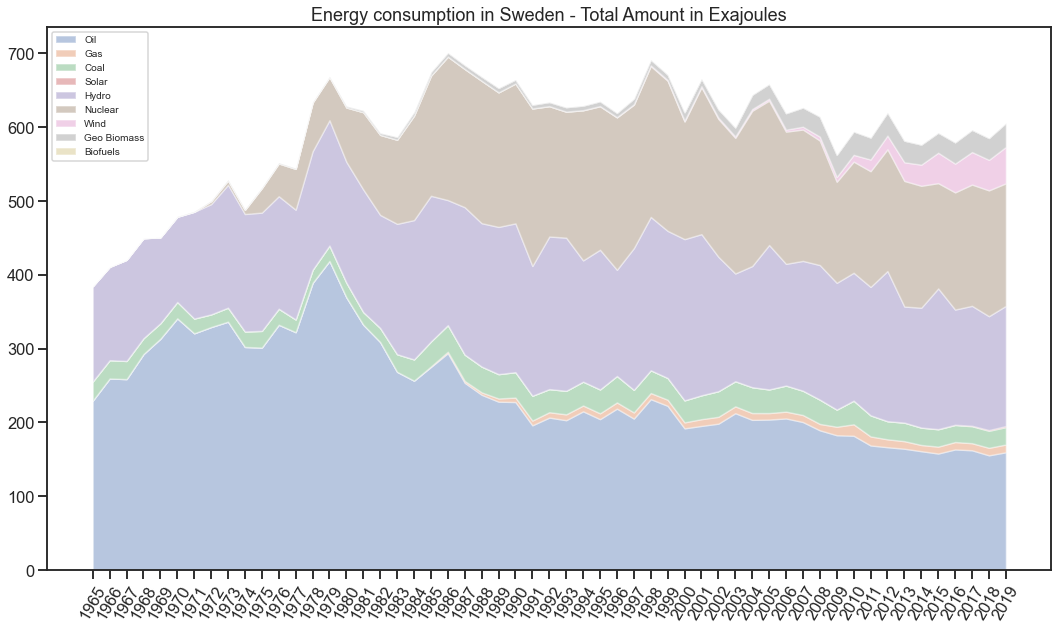

In [105]:
#Visualization: Energy consumption by source in SWEDEN >>>Slide 22>>>

#Observation: Wind and Biomass has been increasing their share in Sweden Energy Matrix since 2011.

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Sweden["Year"], energy_consump_Sweden["Oil Consumption - EJ"], energy_consump_Sweden["Gas Consumption - EJ"],
              energy_consump_Sweden["Coal Consumption - EJ"], energy_consump_Sweden["Solar Consumption - EJ"],
              energy_consump_Sweden["Hydro Consumption - EJ"], energy_consump_Sweden["Nuclear Consumption - EJ"],
              energy_consump_Sweden["Wind Consumption - EJ"], energy_consump_Sweden["Geo Biomass Other - EJ"],
              energy_consump_Finland["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.title("Energy consumption in Sweden - Total Amount in Exajoules")
plt.show()


In [106]:
#Creating an object to look at the historical energy consumption in IRELAND

energy_consump_Ireland = energy_consump.loc[energy_consump['Entity'] == "Ireland"]

energy_consump_Ireland.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
2665  Ireland  IRL  1965             28.522187                   0.0   
2666  Ireland  IRL  1966             31.881576                   0.0   
2667  Ireland  IRL  1967             35.695720                   0.0   
2668  Ireland  IRL  1968             39.704049                   0.0   
2669  Ireland  IRL  1969             43.153470                   0.0   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
2665              36.355409                     0.0                2.616752   
2666              41.414463                     0.0                2.358307   
2667              44.100995                     0.0                2.229085   
2668              53.858573                     0.0                2.132168   
2669              51.276711                     0.0                1.615279   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
2665                       0.0                    0.0                     0.0   
2666                       0.0                    0.0                     0.0   
2667                       0.0                    0.0                     0.0   
2668                       0.0                    0.0                     0.0   
2669                       0.0                    0.0                     0.0   

      Biofuels (TWh)  
2665             0.0  
2666             0.0  
2667             0.0  
2668             0.0  
2669             0.0

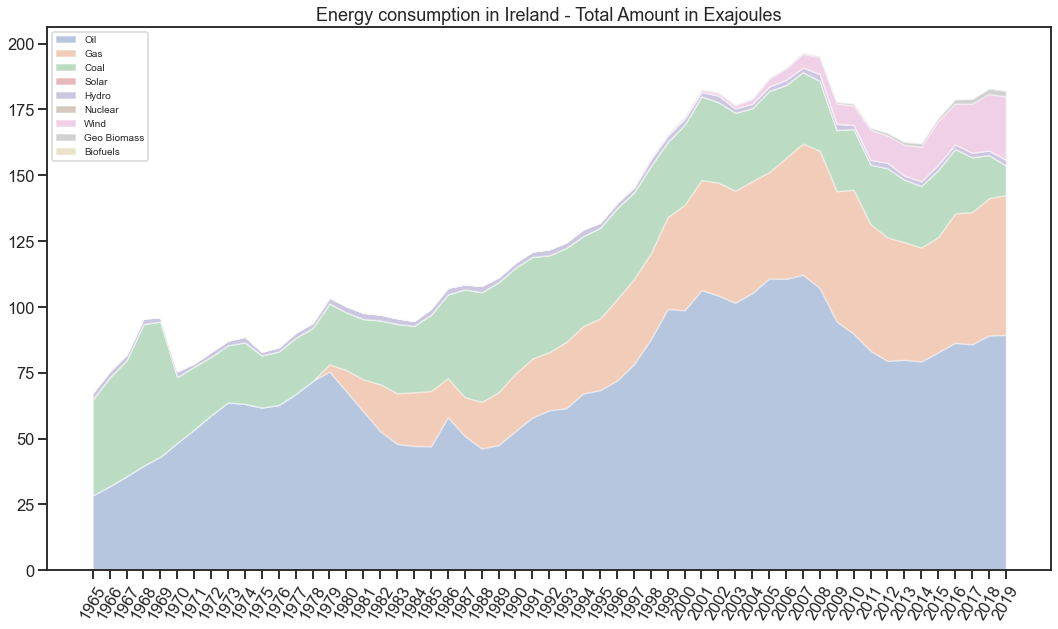

In [107]:
#Visualization: Energy consumption by source in IRELAND >>>Slide 22>>>

#Observation: The Wind share has been increasing after Carbon Tax Implementation

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Ireland["Year"], energy_consump_Ireland["Oil Consumption - EJ"], energy_consump_Ireland["Gas Consumption - EJ"],
              energy_consump_Ireland["Coal Consumption - EJ"], energy_consump_Ireland["Solar Consumption - EJ"],
              energy_consump_Ireland["Hydro Consumption - EJ"], energy_consump_Ireland["Nuclear Consumption - EJ"],
              energy_consump_Ireland["Wind Consumption - EJ"], energy_consump_Ireland["Geo Biomass Other - EJ"],
              energy_consump_Ireland["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.title("Energy consumption in Ireland - Total Amount in Exajoules")
plt.show()

In [109]:
#Creating an object to look at the historical CO2 emissions in GERMANY

CO2_emissions_Germany = df3.loc[df3['Entity'] == "Germany"]

CO2_emissions_Germany = CO2_emissions_Germany.loc[CO2_emissions_Germany['Year'] > 1964]

CO2_emissions_Germany.head()


Entity Code  Year  Annual CO2 emissions
22355  Germany  DEU  1965          9.601022e+08
22356  Germany  DEU  1966          9.514220e+08
22357  Germany  DEU  1967          9.362294e+08
22358  Germany  DEU  1968          9.847908e+08
22359  Germany  DEU  1969          1.052001e+09

Text(0.5, 1.0, 'CO2 emissions in Germany (in mil tonnes)')

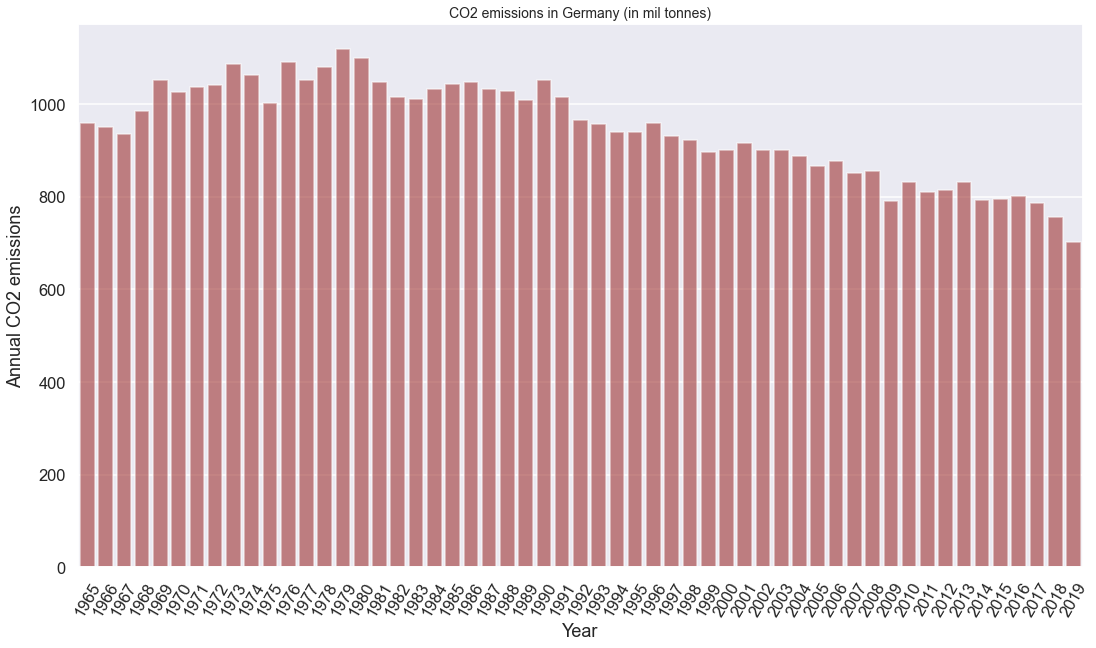

In [111]:
#Visualization: CO2 emissions in GERMANY (tons) >>>Slide 23>>>

#Observation: There is a tinny, but constant, downward trend in CO2 emissions.

sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (18,10)
figGer = sns.barplot(x="Year", y=((CO2_emissions_Germany["Annual CO2 emissions"])/1000000), data= CO2_emissions_Germany, color= "firebrick", alpha= 0.6)
figGer.set_xticklabels(figGer.get_xticklabels(),rotation=60)
plt.title("CO2 emissions in Germany (in mil tonnes)", fontsize=14, fontweight=2)

In [112]:
#Creating an object to look at the historical CO2 emissions in GERMANY by sector

co2_emis_sector_Germany = df5.loc[df5["Entity"]== "Germany"]

In [113]:
co2_emis_sector_Germany.head()

Entity Code  Year  Building (CAIT, 2020)  Industry (CAIT, 2020)  \
1782  Germany  DEU  1990            197300000.0             15300000.0   
1783  Germany  DEU  1991            195200000.0             13740000.0   
1784  Germany  DEU  1992            179900000.0             14440000.0   
1785  Germany  DEU  1993            188200000.0             14530000.0   
1786  Germany  DEU  1994            176100000.0             15340000.0   

      Land-Use Change and Forestry (CAIT, 2020)  \
1782                                -52950000.0   
1783                                -52950000.0   
1784                                -52950000.0   
1785                                -52950000.0   
1786                                -52950000.0   

      Other Fuel Combustion (CAIT, 2020)  Transport (CAIT, 2020)  \
1782                          16300000.0             158600000.0   
1783                          18000000.0             161500000.0   
1784                          16200000.0             164100000.0   
1785                          13100000.0             168700000.0   
1786                          14100000.0             166000000.0   

      Manufacturing & Construction (CAIT, 2020)  \
1782                                156100000.0   
1783                                133600000.0   
1784                                124800000.0   
1785                                117500000.0   
1786                                117900000.0   

      Fugitive Emissions (CAIT, 2020)  Electricity & Heat (CAIT, 2020)  
1782                              NaN                      411700000.0  
1783                         980000.0                      409300000.0  
1784                         710000.0                      392700000.0  
1785                         660000.0                      384300000.0  
1786                        1370000.0                      384900000.0

In [114]:
#Converting the unit of measurement to tons in order to make the graph easier to read

co2_emis_sector_Germany['Building (CAIT, 2020)'] = co2_emis_sector_Germany['Building (CAIT, 2020)']/1000
co2_emis_sector_Germany['Industry (CAIT, 2020)'] = co2_emis_sector_Germany['Industry (CAIT, 2020)']/1000
co2_emis_sector_Germany['Land-Use Change and Forestry (CAIT, 2020)'] = co2_emis_sector_Germany['Land-Use Change and Forestry (CAIT, 2020)']/1000
co2_emis_sector_Germany['Other Fuel Combustion (CAIT, 2020)'] = co2_emis_sector_Germany['Other Fuel Combustion (CAIT, 2020)']/1000
co2_emis_sector_Germany['Transport (CAIT, 2020)'] = co2_emis_sector_Germany['Transport (CAIT, 2020)']/1000
co2_emis_sector_Germany['Manufacturing & Construction (CAIT, 2020)'] = co2_emis_sector_Germany['Manufacturing & Construction (CAIT, 2020)']/1000
co2_emis_sector_Germany['Fugitive Emissions (CAIT, 2020)'] = co2_emis_sector_Germany['Fugitive Emissions (CAIT, 2020)']/1000
co2_emis_sector_Germany['Electricity & Heat (CAIT, 2020)'] = co2_emis_sector_Germany['Electricity & Heat (CAIT, 2020)']/1000


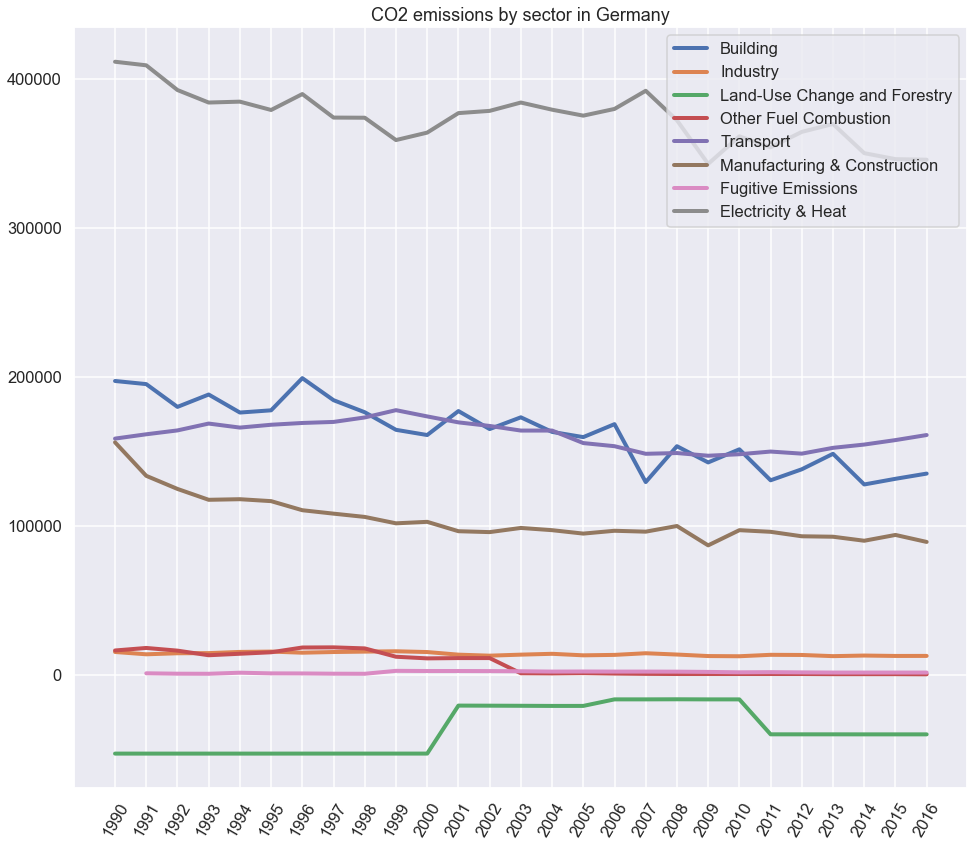

In [116]:
#Visualization: CO2 emissions by sector in GERMANY >>>Slide 24>>>

plt.rcParams["figure.figsize"] = (16,14)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Building (CAIT, 2020)'], label='Building', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Industry (CAIT, 2020)'], label= 'Industry', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Land-Use Change and Forestry (CAIT, 2020)'], label='Land-Use Change and Forestry', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Other Fuel Combustion (CAIT, 2020)'], label= 'Other Fuel Combustion', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Transport (CAIT, 2020)'], label='Transport', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Manufacturing & Construction (CAIT, 2020)'], label='Manufacturing & Construction', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Fugitive Emissions (CAIT, 2020)'], label= 'Fugitive Emissions', linewidth=4)
plt.plot(co2_emis_sector_Germany['Year'], co2_emis_sector_Germany['Electricity & Heat (CAIT, 2020)'], label= 'Electricity & Heat', linewidth=4)

plt.xticks (co2_emis_sector_Germany['Year'], rotation=60)
plt.legend()
plt.title("CO2 emissions by sector in Germany")
plt.show()

In [117]:
#Creating an object to look at the historical energy consumption in GERMANY

energy_consump_Germany = energy_consump.loc[energy_consump['Entity'] == "Germany"]

energy_consump_Germany.head()

Entity Code  Year  Oil Consumption - EJ  Gas Consumption - EJ  \
2122  Germany  DEU  1965           1020.570594             30.975698   
2123  Germany  DEU  1966           1141.833067             37.229952   
2124  Germany  DEU  1967           1187.422569             47.988687   
2125  Germany  DEU  1968           1331.123798             78.869803   
2126  Germany  DEU  1969           1496.942932            112.316464   

      Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
2122            1869.478033                     0.0               45.033950   
2123            1745.340823                     0.0               48.705588   
2124            1681.305778                     0.0               46.256459   
2125            1705.440393                     0.0               46.941679   
2126            1755.961883                     0.0               38.093024   

      Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
2122                  0.325000                    0.0                     0.0   
2123                  0.736112                    0.0                     0.0   
2124                  3.402781                    0.0                     0.0   
2125                  4.905559                    0.0                     0.0   
2126                 13.713900                    0.0                     0.0   

      Biofuels (TWh)  
2122             0.0  
2123             0.0  
2124             0.0  
2125             0.0  
2126             0.0

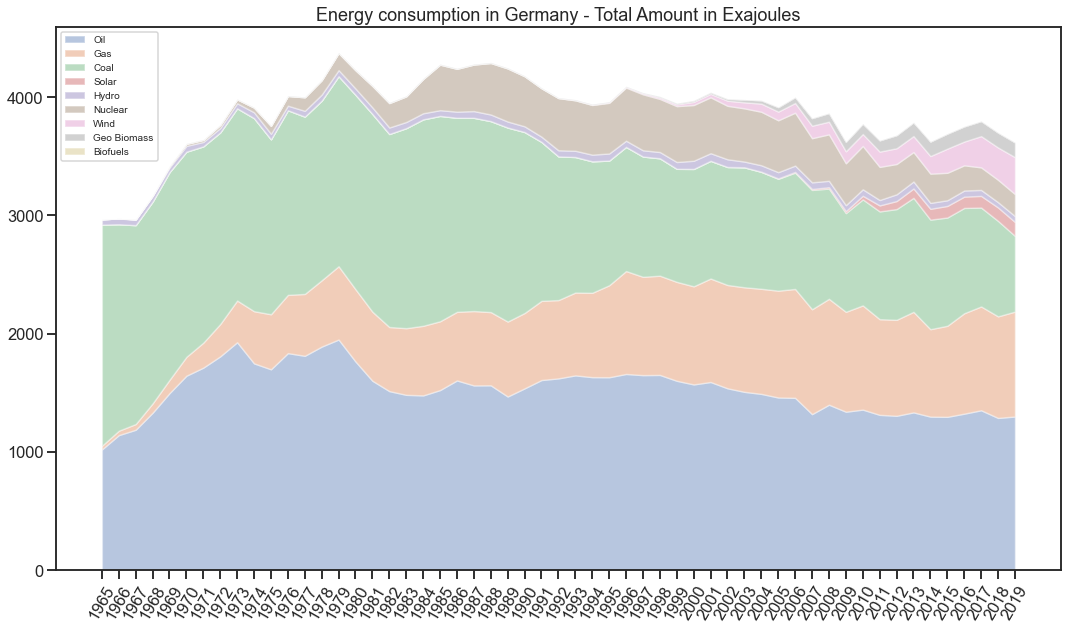

In [118]:
#Visualization: Energy consumption by source in GERMANY >>>Slide 25>>>

#Observation: Renewable energies such as Wind, Biomass and Solar, has been increasing their shares in Germany Energy Matrix

sns.set_style('ticks')

plt.rcParams["figure.figsize"]= 18,10
pal = sns.color_palette("Set1")
plt.stackplot(energy_consump_Germany["Year"], energy_consump_Germany["Oil Consumption - EJ"], energy_consump_Germany["Gas Consumption - EJ"],
              energy_consump_Germany["Coal Consumption - EJ"], energy_consump_Germany["Solar Consumption - EJ"],
              energy_consump_Germany["Hydro Consumption - EJ"], energy_consump_Germany["Nuclear Consumption - EJ"],
              energy_consump_Germany["Wind Consumption - EJ"], energy_consump_Germany["Geo Biomass Other - EJ"],
              energy_consump_Germany["Biofuels (TWh)"], labels=['Oil', 'Gas', 'Coal', 'Solar', 'Hydro', 'Nuclear', 'Wind', 'Geo Biomass', 'Biofuels'],
              alpha= 0.4)
              
plt.legend(loc='upper left', fontsize = 10)
plt.xticks(np.arange(1965,2020,step=1), rotation=60)
plt.title("Energy consumption in Germany - Total Amount in Exajoules")
plt.show()

CONCLUSION:

From the datasets analysis we can say:

- CO2 emissions didn't present a significant decrease with the implementation of Carbon Tax. 

- It's necessary to put more effort in public policies that contribute with the Goals of CO2 reduction.


FURTHER QUESTIONS:
- How was the country's GDP affected when emissions declined?
- Which sectors received some kind of incentive in this countries?
- Should "reward good practices" be more effective than "penalize"?
- If Carbon Tax were more expensive, CO2 emissions would decrease more?

AND THE MOST IMPORTANT QUESTION FOR ME:
- How further a Data Scientist should dig in to look for answers?

EXTRA PRACTICE:

In [119]:
#Visualization Energy consumption by source - interactive

plt.rcParams["figure.figsize"]= 16,8

fig = go.Figure()

fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Oil Consumption - EJ"], fill='tonexty', name= "Oil Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Gas Consumption - EJ"], fill='tozeroy', name= "Gas Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Coal Consumption - EJ"], fill='tozeroy', name= "Coal Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Solar Consumption - EJ"], fill='tozeroy', name= "Solar Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Hydro Consumption - EJ"], fill='tozeroy', name= "Hydro Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Nuclear Consumption - EJ"], fill='tozeroy', name= "Nuclear Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Wind Consumption - EJ"], fill='tozeroy', name= "Wind Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Sweden["Year"], y=energy_consump_Sweden["Geo Biomass Other - EJ"], fill='tozeroy', name= "Geo Biomass Other - EJ"))

fig.show()

In [120]:
#Visualization Energy consumption by source - interactive

plt.rcParams["figure.figsize"]= 16,8

fig = go.Figure()

fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Oil Consumption - EJ"], fill='tonexty', name= "Oil Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Gas Consumption - EJ"], fill='tozeroy', name= "Gas Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Coal Consumption - EJ"], fill='tozeroy', name= "Coal Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Solar Consumption - EJ"], fill='tozeroy', name= "Solar Consumption - EJ")) 
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Hydro Consumption - EJ"], fill='tozeroy', name= "Hydro Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Nuclear Consumption - EJ"], fill='tozeroy', name= "Nuclear Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Wind Consumption - EJ"], fill='tozeroy', name= "Wind Consumption - EJ"))
fig.add_trace(go.Scatter(x=energy_consump_Poland["Year"], y=energy_consump_Poland["Geo Biomass Other - EJ"], fill='tozeroy', name= "Geo Biomass Other - EJ"))

fig.show()

Graph that didn't work!


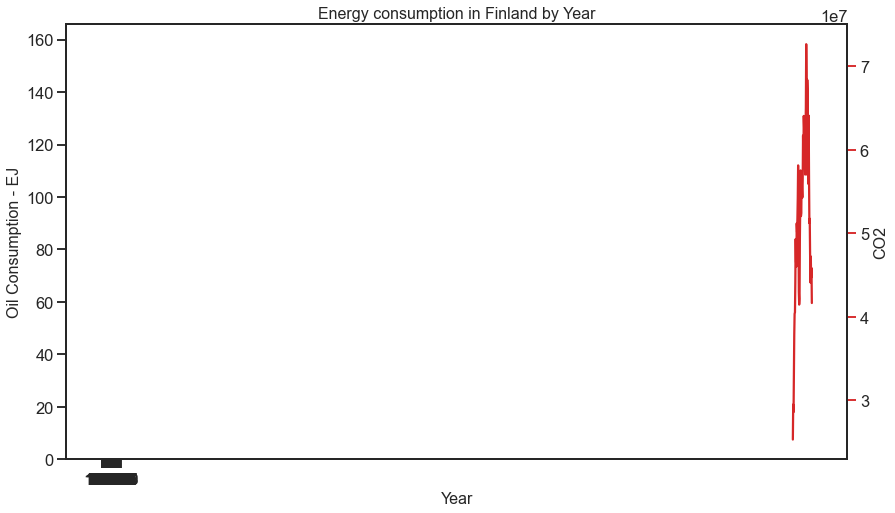

In [121]:
#Consumption of Renewable Energy of Selected Countries (df3) - From 2010

#Create combo chart
fig, ax1 = plt.subplots(figsize=(14,8))
color = 'tab:green'
#bar plot creation
ax1.set_title('Energy consumption in Finland by Year', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Energy consumption', fontsize=16)
ax1 = sns.barplot(x='Year', y='Oil Consumption - EJ', data = energy_consump_Finland, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('CO2', fontsize=16)
ax2 = sns.lineplot(x='Year', y='Annual CO2 emissions', data = CO2_emissions_Finland, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [122]:
#List Europe countries

europe = ("Denmark", "Estonia", "Finland", "France", "Germany", "Ireland", "Latvia", "Luxembourg", "Netherlands", "Poland",
         "Portugal", "Slovenia", "Spain", "Sweden")


<AxesSubplot:xlabel='Year'>

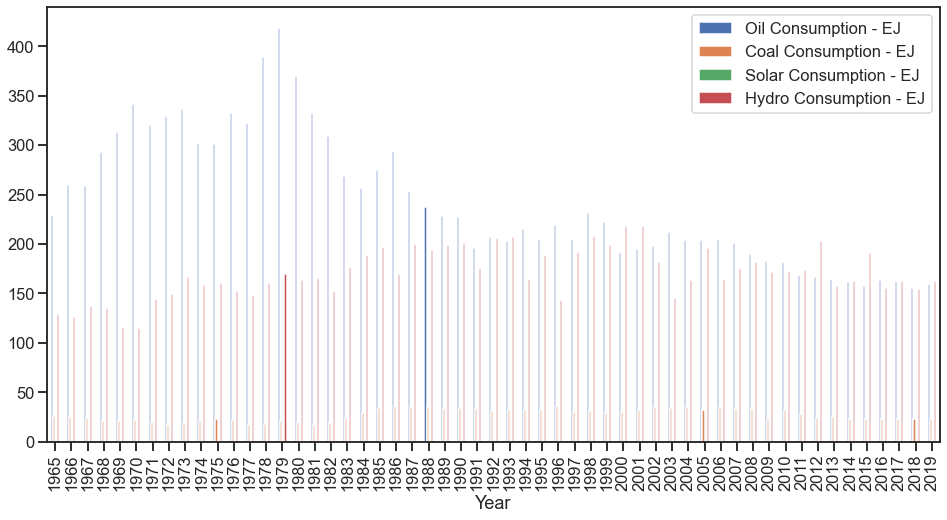

In [124]:
energy_consump_Sweden.plot(x= "Year", y=["Oil Consumption - EJ", "Coal Consumption - EJ", "Solar Consumption - EJ", "Hydro Consumption - EJ"], kind= "bar")

END OF THE PROJECT - MUNICH, 20/06/2021


Liliani Dimer Lacerda
